# Рынок заведений общественного питания Москвы
*(убраны подробности в целях соблюдения авторских прав Яндекса)*

Мы собираемся открыть в Москве своё заведение с роботами-официантами. Это необычный и дорогой проект. Нужно исследовать рынок общепита, и предложить оптимальный вариант по местоположению, типу заведения и возможности развития сети.

## Содержание:
- [Шаг №1. Загрузите данные и подготовьте их к анализу](#1)
- [Шаг №2. Анализ данных](#2)
    - [2.1 Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#2.1)
    - [2.2 Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.](#2.2)
    - [2.3 Для какого вида объекта общественного питания характерно сетевое распространение?](#2.3)
    - [2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#2.4)
    - [2.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#2.5)
    - [2.6 Выделите в отдельный столбец информацию об улице из столбца address.](#2.6)
    - [2.7 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#2.7)
    - [2.8 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#2.8)
    - [2.9 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#2.9)
    - [2.10 Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.](#2.10)
- [Шаг №3. Подготовка презентации](#3)


# <a id='1'></a>Шаг №1. Загрузите данные и подготовьте их к анализу

## Описание данных
Дана таблица со следующими данными о точках общественного питания:
- идентификатор объекта;
- название объекта общественного питания;
- сетевой ресторан;
- тип объекта общественного питания;
- адрес;
- количество посадочных мест.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import textwrap
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
# настройка стилей графиков
plt.style.use('seaborn-deep')

In [3]:
# настройка формата данных в таблицах
pd.options.display.float_format = '{:.2f}'.format

In [4]:
data = pd.read_csv('/datasets/rest_data.csv')
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


#### Проверка уникальности идентификаторов

In [6]:
data.duplicated(subset=['id']).sum()

0

#### Проверка уникальности названий заведений

In [7]:
all_dup_obj_names = data.duplicated(subset=['object_name'], keep=False)
data[all_dup_obj_names]['object_name'].value_counts().head(10)

Столовая           267
Кафе               236
Шаурма             234
KFC                155
Шоколадница        142
Бургер Кинг        122
Макдоналдс         122
Домино'с Пицца      86
Теремок             84
Крошка Картошка     82
Name: object_name, dtype: int64

Почти 3-я часть заведений с повторяющимися названиями. Посмотрю, какие из них являются сетевыми:

In [8]:
data[all_dup_obj_names]['chain'].value_counts()

нет    3476
да     2538
Name: chain, dtype: int64

Логично, т.к. заведения с названиями "Столовая", "Кафе" и др. не относятся к сетевым, однако часто встречаются.

Из оставшихся - сетевых быть не должно.

In [9]:
data[(~all_dup_obj_names)&(data['chain'] == 'да')]['object_name'].value_counts()

Pizengof99 СПБ             1
ДЕТСКИЙ КЛУБ «АНДЕРСОН»    1
Шоколад                    1
КАФЕ «Восточный базар»     1
Пражечка                   1
                          ..
Кафе «Марукамэ»            1
Магбургер АЗС №17          1
Старина Миллер             1
КАФЕ МАКДОНАЛДС            1
KFC Волгоградский          1
Name: object_name, Length: 430, dtype: int64

Как видно, это названия также сетевых заведений, однако несколько нестандартные.

#### Проверка корректности столбца с указанием сетевых заведений

In [10]:
data.chain.value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

#### Проверка типов заведений

In [11]:
data.object_type.value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Всё ок

#### Проверка адреса

In [12]:
# нет "Москвы" в названии
data[~data.address.str.contains('город Москва')].shape[0]

71

In [13]:
def print_table_info(table, text_total=None):
    print('Начало таблицы:')
    display(table.head())
    print('...')
    print('Конец таблицы:')
    display(table.tail())
    if text_total:
        print(text_total, table.shape[0])
    else:
        print('Всего строк:', table.shape[0])
    
print_table_info(data[~data.address.str.contains('город Москва')], 'Строк без указания города Москвы')

Начало таблицы:


,id,object_name,chain,object_type,address,number
859,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"Партизанская улица, дом 30",100
860,23604,Буфет - ГБОУ 60,нет,буфет,"Партизанская улица, дом 30",100
1491,25349,Ресторан «Гранатовый сад»,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40
7691,132359,Кафе «La Carotte»,нет,кафе,"1-й Нагатинский проезд, дом 10",198
7827,28214,Роснефть (закрытое),нет,столовая,"Софийская набережная, дом 26/1, строение 1",80


...
Конец таблицы:


,id,object_name,chain,object_type,address,number
13185,192918,Limassol,нет,кафе,"Бауманская улица, дом 7, строение 3",42
13399,204788,Крошка Картошка,да,предприятие быстрого обслуживания,"Солянский тупик, дом 1/4, строение 1",15
13991,204917,Шаурма на углях- Чайхана Баракат,нет,кафе,"Таганская площадь, дом 88, строение 4",80
14003,211986,FRESH CAFE,нет,кафе,"Шарикоподшипниковская улица, дом 5, строение 1",42
15015,208239,ГАЗПРОМНЕФТЬ,нет,кафе,"поселение ""Мосрентген"", деревня Дудкино, владе...",20


Строк без указания города Москвы 71


In [14]:
# проверка на некорректные адреса
print('Количество строк меньше 10 символов:', len(data[data.address.str.len() < 10]))

Количество строк меньше 10 символов: 0


#### Проверка количества мест в заведении

count   15366.00
mean       59.55
std        74.74
min         0.00
25%        12.00
50%        40.00
75%        80.00
max      1700.00
Name: number, dtype: float64

0     1621
40     835
20     727
30     685
10     644
Name: number, dtype: int64

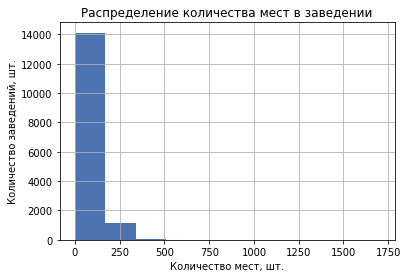

In [15]:
display(data.number.describe())
display(data.number.value_counts().head())
data.number.hist()
plt.title('Распределение количества мест в заведении')
plt.xlabel('Количество мест, шт.')
plt.ylabel('Количество заведений, шт.')
plt.show()

In [16]:
data[data.number == 0].object_type.value_counts()

предприятие быстрого обслуживания    704
кафе                                 310
закусочная                           189
магазин (отдел кулинарии)            145
кафетерий                            113
буфет                                 68
ресторан                              45
бар                                   28
столовая                              19
Name: object_type, dtype: int64

Вывод: выявил множество заведений без мест для посетителей, и это не только магазины, но и кафе и рестораны, где мест не может не быть.

#### Исправление найденных ошибок

Буква "ё".

In [17]:
data.address = data.address.str.replace('ё', 'е')
data.address = data.address.str.replace('Ё', 'Е')

Служебный столбец для группировки по названиям

In [18]:
data['object_name_unified'] = data.object_name.str.lower()
data['object_name_unified'] = data.object_name_unified.str.replace('[^A-zА-я0-9\-\s]', '')

Заголовки

In [19]:
data = data.rename(columns={'chain':'is_chain', 'number': 'number_seats'})
data.head()

,id,object_name,is_chain,object_type,address,number_seats,object_name_unified
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель


Тип данных столбца chain

In [20]:
data.is_chain = np.where(data.is_chain == 'да', True, False)
display(data.info())
display(data.is_chain.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
id                     15366 non-null int64
object_name            15366 non-null object
is_chain               15366 non-null bool
object_type            15366 non-null object
address                15366 non-null object
number_seats           15366 non-null int64
object_name_unified    15366 non-null object
dtypes: bool(1), int64(2), object(4)
memory usage: 735.4+ KB


None

False    12398
True      2968
Name: is_chain, dtype: int64

Странно, когда в сетевых заведениях есть только 1 точка, найду такие:

In [21]:
chain_sizes = data[data.is_chain == True].groupby('object_name_unified').agg({'id':'nunique', 'object_name': 'first', 'address': 'first'}).rename(columns={'id':'count'})
print_table_info(chain_sizes, 'Сетевых заведений всего:')

Начало таблицы:


,count,object_name,address
object_name_unified,,,
beverly hills diner,1,Beverly Hills Diner,"город Москва, Никольская улица, дом 10"
bierloga,1,Bierloga,"город Москва, Туристская улица, дом 13, корпус 2"
black white,1,Black & White,"город Москва, поселение Рязановское, поселок З..."
bocconcino,3,Bocconcino,"город Москва, Ленинский проспект, дом 109"
boobo,1,BooBo,"город Москва, Дмитровское шоссе, дом 73, строе..."


...
Конец таблицы:


,count,object_name,address
object_name_unified,,,
якитория и ян примус,1,Якитория и Ян Примус,"город Москва, Спартаковская улица, дом 25/28, ..."
ямми микс,1,ЯММИ МИКС,"город Москва, шоссе Энтузиастов, дом 12, корпус 2"
ян примус,1,Ян Примус,"город Москва, Осенний бульвар, дом 7, корпус 1"
японский ресторан ваби-саби,1,Японский ресторан «Ваби-Саби»,"город Москва, Кантемировская улица, дом 47"
япоша,2,ЯПОША,"город Москва, Профсоюзная улица, дом 129А"


Сетевых заведений всего: 552


Распределение по количеству

In [22]:
chain_sizes

,count,object_name,address
object_name_unified,,,
beverly hills diner,1,Beverly Hills Diner,"город Москва, Никольская улица, дом 10"
bierloga,1,Bierloga,"город Москва, Туристская улица, дом 13, корпус 2"
black white,1,Black & White,"город Москва, поселение Рязановское, поселок З..."
bocconcino,3,Bocconcino,"город Москва, Ленинский проспект, дом 109"
boobo,1,BooBo,"город Москва, Дмитровское шоссе, дом 73, строе..."
...,...,...,...
якитория и ян примус,1,Якитория и Ян Примус,"город Москва, Спартаковская улица, дом 25/28, ..."
ямми микс,1,ЯММИ МИКС,"город Москва, шоссе Энтузиастов, дом 12, корпус 2"
ян примус,1,Ян Примус,"город Москва, Осенний бульвар, дом 7, корпус 1"


count
1     303
2      77
3      46
4      16
5      17
6      21
7      10
8       3
9       6
10      7
Name: object_name, dtype: int64

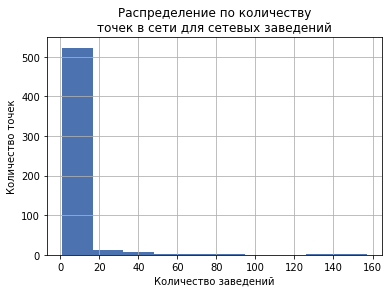

In [23]:
chain_stat = chain_sizes.groupby('count').object_name.count()
display(chain_stat.sort_index(ascending=True).head(10))
plt.hist(chain_sizes['count'])
plt.title('Распределение по количеству\nточек в сети для сетевых заведений')
plt.ylabel('Количество точек')
plt.xlabel('Количество заведений')
plt.grid()
plt.show()

Подозрительно много сетевых заведений с 1 работающей точкой, исследую их подробнее:

In [24]:
chain_sizes[chain_sizes['count'] == 1].index.tolist()[:15]

['beverly hills diner',
 'bierloga',
 'black  white',
 'boobo',
 'bubbleology',
 'coffeeshop',
 'cookhouse',
 'deli by prime прайм-кафе',
 'florentini',
 'fridays',
 'fridays kfc',
 'goodman гудман',
 'grand cru',
 'grand урюк',
 'il forno иль форно']

Найду соответствия в названиях менее 10 точек на сеть - по названиям более популярных сетей. Может быть, из-за индивидуального названия я не смог определить принадлежность к сети автоматически.

In [25]:
chains_top_names = chain_sizes[chain_sizes['count'] > 10].index.tolist()
chains_top_names = '|'.join(chains_top_names)
chains_top_names

'cofix|kfc|starbucks|subway|алло пицца|андерсон|баскин роббинс|бургер кинг|ваби-саби|волконский|додо пицца|доминос пицца|иль патио|кафе kfc|кафе шоколадница|кофе с собой|кофе хаус|кофемания|крошка картошка|кружка|кулинарная лавка братьев караваевых|макдоналдс|милти|му-му|мята lounge|папа джонс|пицца паоло|пицца хат|пиццерия папа джонс|прайм стар|ресторан тануки|сабвей|старбакс|стардогs|суши wok|суши вок|суши сет|сушишоп|тануки|теремок|хинкальная|хлеб насущный|чайхона 1|шоколадница|штолле|якитория'

По наиболее встречающимся названиям найденные нестандартные написания: кафе "kfc", кафе "шоколадница", ресторан "тануки", сабвей, старбакс, стардогs, суши вок

In [26]:
chains_tail = chain_sizes[chain_sizes['count'] <= 10]
print_table_info(chains_tail, 'Количество сетей с 10 или менее точек:')

Начало таблицы:


,count,object_name,address
object_name_unified,,,
beverly hills diner,1,Beverly Hills Diner,"город Москва, Никольская улица, дом 10"
bierloga,1,Bierloga,"город Москва, Туристская улица, дом 13, корпус 2"
black white,1,Black & White,"город Москва, поселение Рязановское, поселок З..."
bocconcino,3,Bocconcino,"город Москва, Ленинский проспект, дом 109"
boobo,1,BooBo,"город Москва, Дмитровское шоссе, дом 73, строе..."


...
Конец таблицы:


,count,object_name,address
object_name_unified,,,
якитория и ян примус,1,Якитория и Ян Примус,"город Москва, Спартаковская улица, дом 25/28, ..."
ямми микс,1,ЯММИ МИКС,"город Москва, шоссе Энтузиастов, дом 12, корпус 2"
ян примус,1,Ян Примус,"город Москва, Осенний бульвар, дом 7, корпус 1"
японский ресторан ваби-саби,1,Японский ресторан «Ваби-Саби»,"город Москва, Кантемировская улица, дом 47"
япоша,2,ЯПОША,"город Москва, Профсоюзная улица, дом 129А"


Количество сетей с 10 или менее точек: 506


In [27]:
lost_objects = {}
for i, chain in chains_tail.iterrows():

    res = re.search('(' + chains_top_names + ')', chain.name)
    if res is not None:
        chain_info = chain.object_name + '; ' + chain.address
        if res.group(1) in lost_objects.keys():
            lost_objects[res.group(1)].append(chain_info)
        else:
            lost_objects[res.group(1)] = [chain_info]
for key in list(lost_objects.keys())[:5]:
    print('{}: {}'.format(key, lost_objects[key]))
print('...')

kfc: ['Fridays KFC; город Москва, проспект Мира, дом 211, корпус 2', 'KFC Волгоградский; город Москва, Волгоградский проспект, дом 119А', 'Закусочная KFC; город Москва, проспект Мира, дом 211, корпус 2', 'ПБО «KFC»; город Москва, проспект Вернадского, дом 86А', 'ПБО «KFC Покрышкина»; город Москва, улица Покрышкина, дом 4', 'Предприятие быстрого обслуживания «KFC»; город Москва, Кировоградская улица, дом 14', 'Ресторан KFC; город Москва, Автозаводская улица, дом 18', 'Ресторан быстрого питания KFC; город Москва, Варшавское шоссе, дом 152А', 'Ростикс KFC; город Москва, улица Декабристов, дом 12']
хинкальная: ['M Cafe Хинкальная; город Москва, Большой Саввинский переулок, дом 12, строение 10А', 'Marrakesh Хинкальная; город Москва, Неглинная улица, дом 10', 'Грузинская кухня ЭZО Хинкальная; город Москва, улица Арбат, дом 31', 'Кафе «Хинкальная»; город Москва, улица Золоторожский Вал, дом 40', 'Мимино Хинкальная; город Москва, улица Шаболовка, дом 2', 'Ресторан Хинкальная; город Москва, про

Найденные несоответствия: Ростикс KFC, все хинкальные (это разные), 'Бодрый день Кофе с собой'. Исключу эти данные из словарей.

In [28]:
wrong_chains = 'хинкальная'
wrong_chain_objects = {'kfc':'Ростикс KFC', 'кофе с собой': 'Бодрый день Кофе с собой'}

In [29]:
# обрезка ненужных адресов
for k, key in enumerate(lost_objects.keys()):
    for i, val in enumerate(lost_objects[key]):
        res = lost_objects[key][i].find(';')
        if res is not None:
            lost_objects[key][i] = val[:res]

In [30]:
# удаление найденных неверных значений из списка найденных сетей
for i, w in enumerate(wrong_chain_objects.keys()):
    wrong_object = wrong_chain_objects[w]
    try:
        lost_objects[w].remove(wrong_chain_objects[w])
        print('Ключ', wrong_object, 'успешно удалён!')
    except:
        print('Ключ', wrong_object, 'отсутствует')

Ключ Ростикс KFC успешно удалён!
Ключ Бодрый день Кофе с собой успешно удалён!


In [31]:
# удаление ключей целиком
try:
    lost_objects.pop('хинкальная')
    print('Успешно удалено!')
except:
    print('Не удалось удалить ключ')

Успешно удалено!


Замена служебных названий для группировки в соответствии с найденными заведениями:

In [32]:
for i, wo in enumerate(lost_objects.keys()):
    n = 0
    for j in range(len(lost_objects[wo])):
        n += data[data.object_name == lost_objects[wo][j]].shape[0]
        data.loc[data.object_name == lost_objects[wo][j], 'object_name_unified'] = wo
    print('Для сети "' + wo + '" заменено', n,'неверных названий сетей')

Для сети "kfc" заменено 10 неверных названий сетей
Для сети "прайм стар" заменено 12 неверных названий сетей
Для сети "starbucks" заменено 5 неверных названий сетей
Для сети "алло пицца" заменено 1 неверных названий сетей
Для сети "мята lounge" заменено 11 неверных названий сетей
Для сети "суши wok" заменено 3 неверных названий сетей
Для сети "кофе с собой" заменено 2 неверных названий сетей
Для сети "бургер кинг" заменено 19 неверных названий сетей
Для сети "чайхона 1" заменено 5 неверных названий сетей
Для сети "милти" заменено 10 неверных названий сетей
Для сети "андерсон" заменено 7 неверных названий сетей
Для сети "доминос пицца" заменено 9 неверных названий сетей
Для сети "баскин роббинс" заменено 3 неверных названий сетей
Для сети "крошка картошка" заменено 6 неверных названий сетей
Для сети "пицца хат" заменено 6 неверных названий сетей
Для сети "стардогs" заменено 3 неверных названий сетей
Для сети "сушишоп" заменено 2 неверных названий сетей
Для сети "теремок" заменено 15 нев

In [33]:
# проверка - см. столбец object_name_unified
data[data.object_name == 'КАФЕ-ПЕКАРЕЯ «ВОЛКОНСКИЙ»']

,id,object_name,is_chain,object_type,address,number_seats,object_name_unified
11946,182715,КАФЕ-ПЕКАРЕЯ «ВОЛКОНСКИЙ»,True,кафе,"город Москва, улица Орджоникидзе, дом 9, корпус 1",3,волконский


Исправлю так же необработанные транслитерированные написания сетей: сабвей, старбакс, стардогs, суши вок

In [34]:
translit = {'сабвей': 'subway',
           'старбакс':'starbucks',
           'стардогs': 'stardogs',
           'суши вок': 'суши wok'}

In [35]:
for tr in translit.keys():
    n = data[data.object_name_unified.str.contains(tr)].shape[0]
    data.loc[data.object_name_unified.str.contains(tr), 'object_name_unified'] = translit[tr]
    print('Для ключа {} успешно заменено {} объектов'.format(tr, n))

Для ключа сабвей успешно заменено 24 объектов
Для ключа старбакс успешно заменено 32 объектов
Для ключа стардогs успешно заменено 17 объектов
Для ключа суши вок успешно заменено 15 объектов


In [36]:
# проверка
data[data.object_name_unified == 'суши вок']

,id,object_name,is_chain,object_type,address,number_seats,object_name_unified


In [37]:
chains_names_repaired1 = data[data.is_chain].object_name_unified.value_counts().to_frame('count_obj')

In [38]:
chains_names_repaired1

,count_obj
макдоналдс,168
kfc,165
шоколадница,163
бургер кинг,155
теремок,108
...,...
бар- буфет николай,1
the terrace,1
шантимель кондитерские,1
movenpick,1


In [39]:
chains_names_repaired1[chains_names_repaired1.index.str.contains('макдоналдс')]

,count_obj
макдоналдс,168
кафе макдоналдс,5


In [40]:
# данные о количестве мест - пропуски:
print('Пропущено данных о количестве посадочных мест: {:.2%}'.format(data[data['number_seats'] == 0].shape[0] / data.shape[0]))

Пропущено данных о количестве посадочных мест: 10.55%


Проверка по категориям

In [41]:
t_all = (data
     .groupby('object_type')
     .agg({'id':'nunique'})
     .rename(columns={'id':'total'}))
t0 = (data[data.number_seats == 0]
     .groupby('object_type')
     .agg({'id':'nunique'})
     .rename(columns={'id':'0'}))
t_all = t_all.join(t0, how='left')
t_all['percent'] = t_all['0'] / t_all['total'] * 100
t_all = t_all.sort_values(by='percent', ascending=False)
t_all['percent']

object_type
магазин (отдел кулинарии)           53.11
закусочная                          52.50
предприятие быстрого обслуживания   36.61
кафетерий                           28.39
буфет                               11.62
кафе                                 5.08
бар                                  3.27
ресторан                             1.97
столовая                             0.73
Name: percent, dtype: float64

In [42]:
data[data.object_type.isin(['столовая', 'ресторан'])&(data.number_seats == 0)]

,id,object_name,is_chain,object_type,address,number_seats,object_name_unified
206,150836,ГБОУ Школа №1468,False,столовая,"город Москва, Волгоградский проспект, дом 17, ...",0,гбоу школа 1468
1873,79718,Макдоналдс,True,ресторан,"город Москва, поселение Московский, деревня Го...",0,макдоналдс
2101,29844,Вкусный выбор,False,столовая,"город Москва, аллея Жемчуговой, дом 1А",0,вкусный выбор
2130,152335,Пищеблок ( закрытое),False,столовая,"город Москва, Ленинский проспект, дом 8, корпу...",0,пищеблок закрытое
2675,23137,Самса Хаус,False,столовая,"город Москва, Широкая улица, дом 12",0,самса хаус
...,...,...,...,...,...,...,...
15084,214843,CoffeeShop,True,ресторан,"город Москва, Кутузовский проспект, дом 57",0,coffeeshop
15105,219032,Бургер Кинг,True,ресторан,"город Москва, улица Вавилова, дом 3",0,бургер кинг
15108,210192,Бургер Кинг,True,ресторан,"город Москва, поселение Московский, Киевское ш...",0,бургер кинг
15236,219130,KFC,True,ресторан,"город Москва, улица Вавилова, дом 3",0,kfc


In [43]:
data['wrong_seats'] = False
data.loc[data.object_type.isin(['столовая', 'ресторан'])&(data.number_seats == 0), 'wrong_seats'] = True

In [44]:
data.wrong_seats.value_counts()

False    15302
True        64
Name: wrong_seats, dtype: int64

Подозрительно выглядят записи о столовых и ресторанах с 0 посадочных мест. Буду фильтровать эти данные при анализе по количеству мест.

#### Проверка на дубликаты

Проверю на дубликаты по адресу и названию:

In [45]:
subset = ['object_name', 'address']

In [46]:
_dup_percent = (data[data.duplicated(subset=subset)]
.groupby(subset)
.id
.nunique()
.value_counts()
.sum()) / data.shape[0]
print('Процент дубликатов: {:.2%}'.format(_dup_percent))

Процент дубликатов: 0.89%


Дубликаты составляют незначительное число (менее 1% записей), удаляю.

In [47]:
data = data.drop_duplicates(subset=subset)

Вывод: В предоставленных данных об объектах общепита в Москве были как незначительные проблемы (нестандартный тип столбца вместо булевого типа для отображения сетевых заведений), так и серьезные - нестандартизированные названия сетей, непригодные для группировки, пришлось исправлять это вручную, и всё равно ошибки при этом неизбежны, данные не стали абсолютно точными.  
Было удалено незначительное количество дубликатов (менее 1%).  
Подозрительно выглядят записи о столовых и ресторанах с 0 посадочных мест. Буду фильтровать эти данные при анализе по количеству мест.

# <a id='2'></a>Шаг №2. Анализ данных

## 2.1 <a id='2.1'></a>Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [48]:
object_type_stat = data.object_type.value_counts(ascending=True).reset_index()
object_type_stat

,index,object_type
0,магазин (отдел кулинарии),272
1,закусочная,345
2,кафетерий,392
3,буфет,567
4,бар,850
5,предприятие быстрого обслуживания,1886
6,ресторан,2272
7,столовая,2572
8,кафе,6003


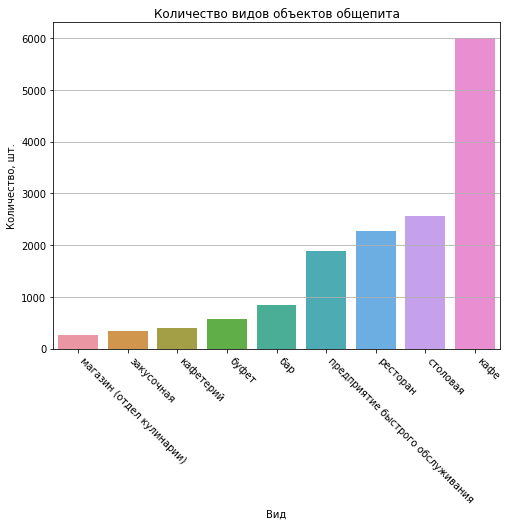

In [49]:
def plot_barplot(x, y, data, fsize=None, title='', xlabel='', ylabel='', xticks=None):
    fig, ax = plt.subplots(figsize=fsize)
    sns.barplot(x=x, y=y, data=data, ax=ax)
    plt.xticks(rotation=-45, ha="left")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y')
    if xticks:
        locs, labels = plt.xticks()
        plt.xticks(locs, labels=xticks)
    plt.show()
    
plot_barplot(x='index', y='object_type', data=object_type_stat, fsize=(8,6),
             title='Количество видов объектов общепита',
             xlabel='Вид',
             ylabel='Количество, шт.')

Вывод: кафе является наиболее распространенным видом объекта общественного питания. Очевидно, в условиях мегаполиса такой формат оказался наиболее удобным и модным.

## 2.2 <a id='2.2'></a>Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [50]:
chain_stat = data.is_chain.value_counts().reset_index()
chain_stat

,index,is_chain
0,False,12219
1,True,2940


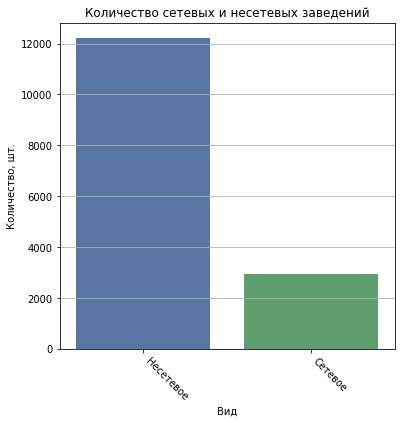

In [51]:
plot_barplot(x='index', y='is_chain', data=chain_stat, fsize=(6,6),
             title='Количество сетевых и несетевых заведений',
             xlabel='Вид',
             ylabel='Количество, шт.',
            xticks=('Несетевое', 'Сетевое'))

Вывод: несетевых заведений по количеству более чем в 4 раза больше. Такой явный перевес можно объяснить тем, что открыть свой бизнес в сфере питания является не такой сложной задачей и многим по плечу.

## 2.3 <a id='2.3'></a>Для какого вида объекта общественного питания характерно сетевое распространение?

In [52]:
# количество всех заведений по типу:
total_types_stat = data.groupby('object_type', as_index=False).agg({'id':'nunique'}).rename(columns={'id': 'total'})

# только сетевые
chain_types_stat = data[data.is_chain].groupby('object_type', as_index=False).agg({'id':'nunique'}).rename(columns={'id': 'chain'})

# объединение
total_types_stat = total_types_stat.merge(chain_types_stat, on='object_type', how='left')

# вычисление доли
total_types_stat['chain_percent'] = total_types_stat['chain'] * 100 / total_types_stat['total']
total_types_stat = total_types_stat.sort_values(by='chain_percent')
total_types_stat

,object_type,total,chain,chain_percent
8,столовая,2572,3,0.12
1,буфет,567,10,1.76
0,бар,850,37,4.35
4,кафетерий,392,51,13.01
2,закусочная,345,56,16.23
3,кафе,6003,1384,23.06
7,ресторан,2272,539,23.72
5,магазин (отдел кулинарии),272,78,28.68
6,предприятие быстрого обслуживания,1886,782,41.46


,object_type,chain_percent
8,столовая,0.12
1,буфет,1.76
0,бар,4.35
4,кафетерий,13.01
2,закусочная,16.23
3,кафе,23.06
7,ресторан,23.72
5,магазин (отдел кулинарии),28.68
6,предприятие быстрого обслуживания,41.46


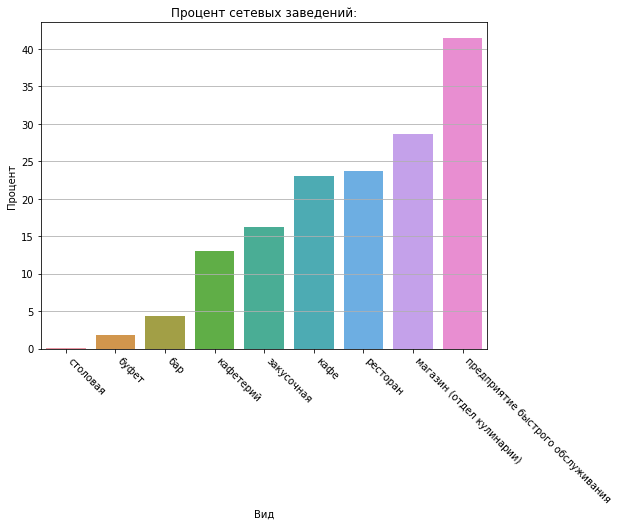

In [53]:
display(total_types_stat[['object_type', 'chain_percent']])
plot_barplot(x='object_type', y='chain_percent', data=total_types_stat, fsize=(8,6),
             title='Процент сетевых заведений:',
             xlabel='Вид',
             ylabel='Процент')

Вывод: сетевое распространение больше всего характерно для предприятий быстрого обслуживания, таких как KFС, Макдоналдс и т.п. - более 40% от всех заведений данного типа.

## 2.4 <a id='2.4'></a>Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [54]:
object_count_total_chain = (data[(data.is_chain)]
                     .groupby('object_name_unified')
                     .agg({'object_name': 'first', 
                          'id': 'nunique'})
                     .rename(columns={'id':'object_count'})
                            .set_index('object_name')
                                                                                  )
object_count_total_chain

,object_count
object_name,
Beverly Hills Diner,1
Bierloga,1
Black & White,1
Bocconcino,3
BooBo,1
...,...
Югос,1
ресторан «Якитория»,45
ЯММИ МИКС,1


In [55]:
def plot_dist(dist, title='', xlabel=''):
    #     уберу хвосты
    dmin = dist.quantile(q=0.01)
    dmax = dist.quantile(q=0.99)
    dist = dist[(dist >= dmin)&(dist <=dmax)]
    
    #     среднее
    dmean = dist.mean()
    print('Среднее:', dmean.round(2))
    
    #     медиана
    dmed = dist.median()
    print('Медиана:', dmed.round(2))
    
    #     моды
    dmodes = dist.mode()
    print('Моды:')
    display(dmodes)
    
    #     графики
    _, ax = plt.subplots(figsize=(11,9))
    sns.distplot(dist, ax=ax)
    plt.ylabel('Плотность вероятности')
    plt.xlabel(xlabel)
    lmean = plt.axvline(dmean, color='green', linestyle='--')
    lmed = plt.axvline(dmed, color='red', linestyle='--')
    for m in dmodes:
        lmode = plt.axvline(m, color='black', linestyle='--')
    plt.title(title)
    plt.legend((lmean, lmed, lmode), ('Среднее', 'Медиана', 'Моды'))
    plt.grid()
    plt.show()

Среднее: 50.24
Медиана: 40.0
Моды:


0    0
dtype: int64

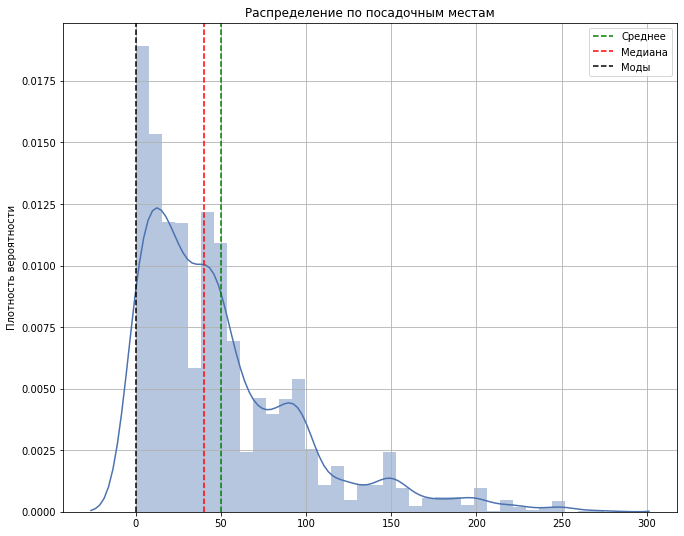

In [56]:
# просмотр распределения для определения подходящей статистики
plot_dist(data[(data.is_chain)&~data.wrong_seats]['number_seats'],'Распределение по посадочным местам')

Распределение посадочных мест по сетям:

In [57]:
object_seats_not_null = (data[(data.is_chain)&~data.wrong_seats]
                     .groupby('object_name_unified')
                     .agg({'number_seats': 'median',
                          'object_name': 'first'}
                         )
                         .set_index('object_name')
                                                                                  )
object_seats_not_null.number_seats = object_seats_not_null.number_seats.astype('int')
print('Сетевые заведения (топ по количеству мест):')
display(object_seats_not_null.sort_values(by='number_seats', ascending=False).head(10))

object_seats_not_null_not_chain = (data[~(data.is_chain)&~(data.wrong_seats)]
                     .groupby('object_name_unified')
                     .agg({'number_seats': 'median',
                          'object_name': 'first'}
                         )
                         .set_index('object_name')
                                                                                  )
object_seats_not_null_not_chain.number_seats = object_seats_not_null_not_chain.number_seats.astype('int')
print('Несетевые заведения (топ по количеству мест):')
display(object_seats_not_null_not_chain.sort_values(by='number_seats', ascending=False).head(10))

object_seats = object_seats_not_null.join(object_seats_not_null_not_chain, lsuffix='_chain', how='outer')

Сетевые заведения (топ по количеству мест):


,number_seats
object_name,
Чешская пивная «Козловица»,306
Ян Примус,300
Старина Миллер,280
Пражечка,266
Ресторан «Чайхана Урюк»,250
Молли гвинз,250
ПИЛЗНЕР,245
БАКИНСКИЙ БУЛЬВАР,240
Кафе Пронто,220


Несетевые заведения (топ по количеству мест):


,number_seats
object_name,
Arena by Soho Family,1700
Банкетный зал Шелк,1500
КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,1288
РУМ СЕРВИС,1200
Ресторан «АЛЬФА»,1040
EATALY,920
СТОЛОВАЯ МОСКОВСКИЙ ГУМАНИТАРНЫЙ УНИВЕРСИТЕТ,760
СТОЛОВАЯ-БУФЕТ,744
White Hall,700


In [58]:
object_seats = object_seats.rename(columns={'number_chain':'Сетевое','number':'Несетевое'})
object_seats

,number_seats_chain,number_seats
object_name,,
1-ЫЙ МОСКОВСКИЙ КАДЕТСКИЙ КОРПУС,nan,260.00
1-й МОК,nan,100.00
100 личная столовая,nan,30.00
100 личное кафе,nan,45.00
1001 ночь,nan,70.00
...,...,...
школа 476,nan,120.00
школа 772,nan,185.00
школа 775,nan,210.00


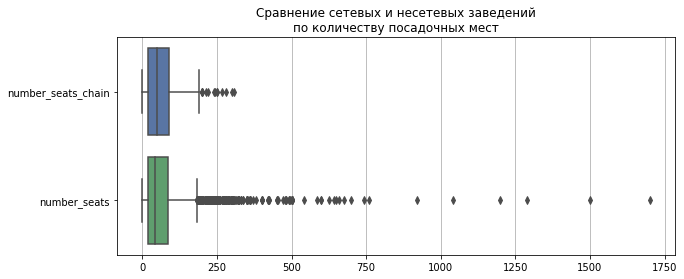

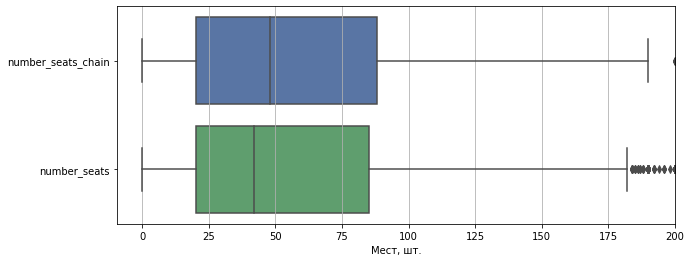

In [59]:
def plot_boxplot_twice(data, fsize=None, title='', xlabel='', ylabel='', xticks=None, yticks=None,
                orient=None, xlim_top=None):
    fig, ax = plt.subplots(figsize=fsize)
    sns.boxplot(data=data, orient=orient)
    xlim1 = plt.xlim()
    if xticks:
        locs, ticks = plt.xticks()
        plt.xticks(locs, xticks)
    if yticks:
        locs, ticks = plt.yticks()
        plt.xticks(locs, yticks)
    plt.title(title)
    plt.grid(axis='x')
#     plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
    fig, ax = plt.subplots(figsize=fsize)
    sns.boxplot(data=data, orient=orient)
#     plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xticks:
        locs, ticks = plt.xticks()
        plt.xticks(locs, xticks)
    if yticks:
        locs, ticks = plt.yticks()
        plt.xticks(locs, yticks)
    if xlim_top:
        plt.xlim(xlim1[0] * xlim_top/ xlim1[1], xlim_top)
    plt.grid(axis='x')
    plt.show()

plot_boxplot_twice(data=object_seats, fsize=(10,4), title='Сравнение сетевых и несетевых заведений\n'+\
                   'по количеству посадочных мест', xlabel='Мест, шт.', ylabel='', xticks=None, yticks=None,
                orient='h', xlim_top=200)

Сетевые заведения по размеру:

In [60]:
data[data.is_chain].groupby('object_name_unified').id.count().sort_values(ascending=False)

object_name_unified
макдоналдс             164
kfc                    161
шоколадница            161
бургер кинг            154
теремок                107
                      ... 
кофе тун                 1
кофе                     1
коста кофе               1
ян примус                1
beverly hills diner      1
Name: id, Length: 427, dtype: int64

In [61]:
(data[data.is_chain]
.groupby('object_name_unified')
.id
.count()
.sort_values(ascending=False)
.value_counts().sort_index()
.head(10))

1     217
2      61
3      42
4      13
5      15
6      17
7       7
8       3
9       4
10      5
Name: id, dtype: int64

Среднее: 5.2
Медиана: 1.0
Моды:


0    1
dtype: int64

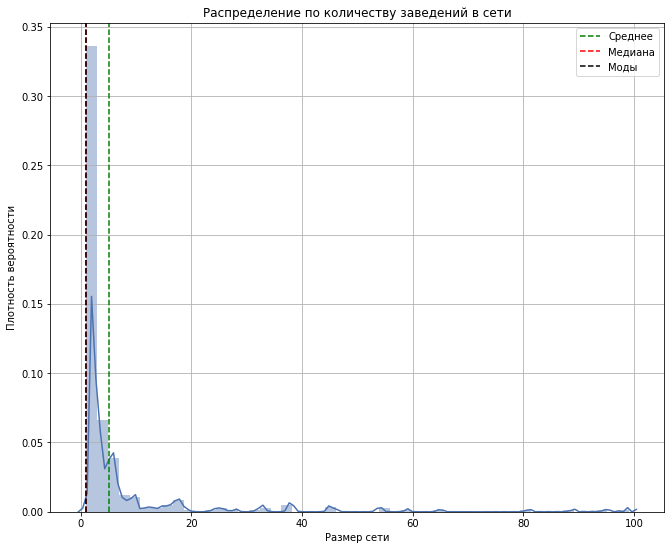

In [62]:
plot_dist(data[data.is_chain].groupby('object_name_unified').id.count(),
          'Распределение по количеству заведений в сети', xlabel='Размер сети')

Вывод: сетевые заведения по количеству посадочных мест почти не отличаются от несетевых, однако у них встречаются заведения с количеством посадочных мест вплоть до 1750. У сетевых же количество как правило не выходит за 300.

Размер сети чаще всего встречается размером в одно заведение, возможно, эти сети распространены за пределами Москвы. Среднее количество заведений в сети - 5.

## 2.5 <a id='2.5'></a>Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [63]:
order_mean_seats = data[~data.wrong_seats].groupby('object_type')['number_seats'].mean().sort_values(ascending=True).index
order_mean_seats

Index(['магазин (отдел кулинарии)', 'закусочная', 'кафетерий',
       'предприятие быстрого обслуживания', 'кафе', 'бар', 'буфет', 'ресторан',
       'столовая'],
      dtype='object', name='object_type')

Количество посадочных мест в зависимости от типа точки общепита:


object_type
магазин (отдел кулинарии)              5
закусочная                             6
кафетерий                              9
предприятие быстрого обслуживания     20
кафе                                  39
бар                                   43
буфет                                 51
ресторан                              99
столовая                             131
Name: number_seats, dtype: int64

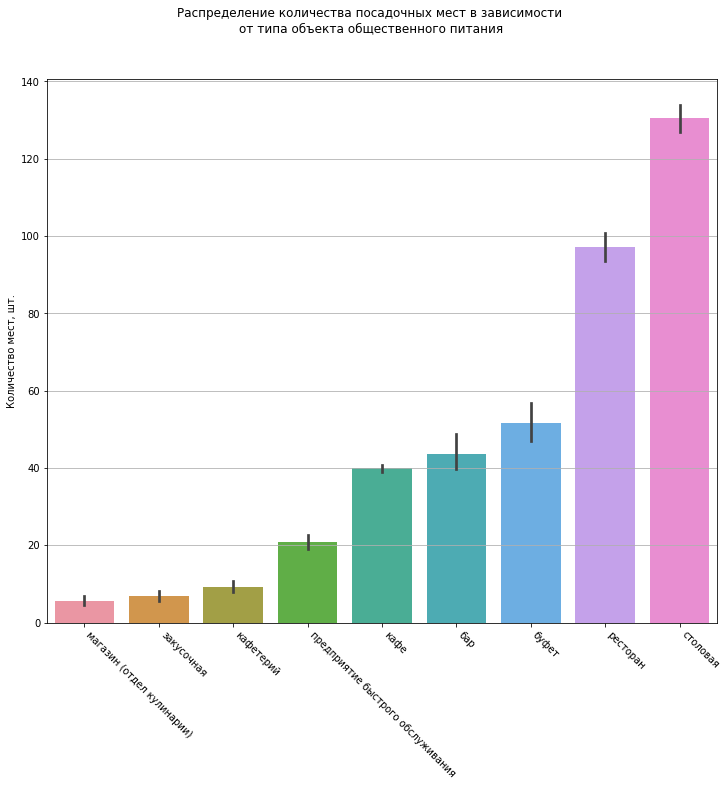

In [64]:
print('Количество посадочных мест в зависимости от типа точки общепита:')
display(data[~data.wrong_seats].groupby('object_type')['number_seats'].mean().sort_values(ascending=True).astype('int'))
fig, ax = plt.subplots(figsize=(12,10))
plt.suptitle('Распределение количества посадочных мест в зависимости \nот типа объекта общественного питания')

sns.barplot(x='object_type', y='number_seats', data=data, order=order_mean_seats)
ylim1 = plt.ylim()
plt.ylabel('Количество мест, шт.')
plt.xlabel('')
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y')

plt.show()

Вывод: среднее количество посадочных мест значительно больше в столовых, рестораны им несколько проигрывают (96 в среднем против 130 у столовых).

## 2.6 <a id='2.6'></a>Выделите в отдельный столбец информацию об улице из столбца address.

In [65]:
def extract_street(adr):
    """
    Функция для выделения улицы из строки. Предполагается, что в строках нет опечаток
    в виде лишних пробелов, отсутствия запятых, опечаток в написании названия улиц и типа строения
    """
    buildings = 'дом|влад|корпус|строение'
    strip_symbols = ' ,'
    if 'город Москва' in adr:
        if re.search('город Москва, (.+), ('+buildings+')', adr) is not None:
#             в регулярном выражении берём мин. соответствие строки ("ленивый" шаблон), чтобы
#             улица выделялась корректно и в случае множественного соответсвия шаблону, напр.
#             "город Москва, Варшавское шоссе, дом 5, корпус 21" или
#             "город Москва, город Зеленоград, корпус 205, строение 3"
#             (примеры произвольные)
            street = re.search('город Москва, (.+?), ('+buildings+')', adr)[1].strip(strip_symbols)
        else:
#             если соответствие шаблону не найдено (упоминание дома и т.п.)
            street = re.search('город Москва, (.+?)', adr)[1].strip(strip_symbols)
            print('Не найдено соответствие шаблону:')
            print('Исходная строка:')
            print(adr)
            print('Найденный адрес:')
            print(street)
            print()
    else:
        if re.search('(.+), ('+buildings+')', adr) is not None:
            street = re.search('(.+?), ('+buildings+')', adr)[1].strip(strip_symbols)
        else:
            street = adr
            print('Не найдено соответствие шаблону:')
            print('Исходная строка:')
            print(adr)
            print('Найденный адрес:')
            print(street)
            print()
    return street

data['street'] = data.address.apply(extract_street)

In [66]:
# проверка на отсутствующие значения - ок
print(data[pd.isna(data.street)]['address'].unique())

[]


Вывод: я выделил название улицы в отдельный столбец и произвёл проверку корректности.

## 2.7 <a id='2.7'></a>Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [67]:
street_objects_count = data[~data.street.str.contains('город')].street.value_counts().sort_values(ascending=False)
streets_main = street_objects_count.head(10).sort_values()
streets_main

Кировоградская улица      106
Каширское шоссе           110
Кутузовский проспект      112
проспект Вернадского      127
Ленинский проспект        148
Варшавское шоссе          161
Пресненская набережная    165
Ленинградский проспект    171
Профсоюзная улица         180
проспект Мира             197
Name: street, dtype: int64

Результаты ожидаемы, кроме Кировоградской улицы. Проверю подробнее, нет ли тут ошибки.

In [68]:
data[data.street.str.contains('Кировоградская')].groupby('address').object_name.nunique()

address
город Москва, Кировоградская улица, владение 15А                    6
город Москва, Кировоградская улица, дом 11                          4
город Москва, Кировоградская улица, дом 11, корпус 1                1
город Москва, Кировоградская улица, дом 12, корпус 2                1
город Москва, Кировоградская улица, дом 13                          1
город Москва, Кировоградская улица, дом 13А                        52
город Москва, Кировоградская улица, дом 14                         11
город Москва, Кировоградская улица, дом 15                          1
город Москва, Кировоградская улица, дом 18, корпус 4                1
город Москва, Кировоградская улица, дом 21                          1
город Москва, Кировоградская улица, дом 21, корпус 1                2
город Москва, Кировоградская улица, дом 22А                         1
город Москва, Кировоградская улица, дом 23                          1
город Москва, Кировоградская улица, дом 23А                         1
город Москва

In [69]:
data[data.address.str.contains('город Москва, Кировоградская улица, дом 13А')].object_name.head(10)

7714                          Теремок
7715                      Бургер Кинг
7716                              KFC
7717                         Старбакс
7718                        Yes PIZZA
7719    Пивзавод ресторан Brotundbeer
7720                        Иль Патио
7721                 Дача на Варшавке
7722                            BAZAR
7723                             Урюк
Name: object_name, dtype: object

Похоже, ошибки нет, и в <a href=https://columbus.moscow/food/>ТРЦ Columbus</a> по адресу Кировоградская ул., д. 13А расположено так много заведений общественного питания, что она выходит в топ.

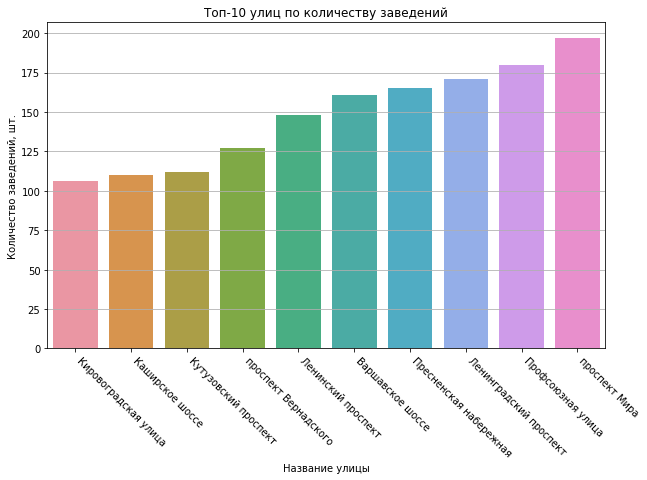

In [70]:
plt.subplots(figsize=(10,6))
sns.barplot(x=streets_main.index, y=streets_main)
plt.xticks(rotation=-45, ha='left')
plt.title('Топ-10 улиц по количеству заведений')
plt.ylabel('Количество заведений, шт.')
plt.xlabel('Название улицы')
plt.grid(axis='y')
plt.show()

### Загрузка данных из внешних источников и их предобработка

Загружу <a href='https://hubofdata.ru/dataset/mosgaz-contacts/resource/92b3edb3-f4c8-4562-9338-264a666d0965'>данные</a> по соответствию улиц районам Москвы из открытых данных с сайта Мосгаза и конкретно <a href=http://hubofdata.ru/storage/f/2013-10-29T17%3A30%3A56.887Z/moscow-buildings.csv>по зданиям</a>:

#### Данные Мосгаза

In [71]:
from io import BytesIO
import requests
spreadsheet_id = '1AKGDg2TwIVZHA4_Hu5_DvMQVOG9SGkBgTtZ25Uyct74'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mosgaz_streets = pd.read_csv(BytesIO(r.content))
mosgaz_streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [72]:
# буква ё
mosgaz_streets.streetname = mosgaz_streets.streetname.str.replace('ё', 'е')
mosgaz_streets.streetname = mosgaz_streets.streetname.str.replace('Ё', 'Е')

In [73]:
mosgaz_streets_groups = mosgaz_streets.groupby('streetname').agg(
    {'area':'unique', 'okrug':'unique'}
)
print_table_info(mosgaz_streets_groups)

Начало таблицы:


,area,okrug
streetname,,
1-й Автозаводский проезд,[Даниловский район],[ЮАО]
1-й Амбулаторный проезд,[Район Аэропорт],[САО]
1-й Архивный переулок,[Район Хамовники],[ЦАО]
1-й Бабьегородский переулок,[Район Якиманка],[ЦАО]
1-й Балтийский переулок,[Район Аэропорт],[САО]


...
Конец таблицы:


,area,okrug
streetname,,
улица Юности,"[Район Вешняки, Район Матушкино-Савелки]","[ВАО, Зеленоград]"
улица Юных Ленинцев,"[Район Кузьминки, Район Текстильщики]",[ЮВАО]
улица Яблочкова,[Бутырский район],[СВАО]
шоссе Фрезер,[Нижегородский район],[ЮВАО]
шоссе Энтузиастов,"[Район Измайлово, Район Перово, Район Соколина...","[ВАО, ЮВАО]"


Всего строк: 3604


In [74]:
# служебные столбцы для определения количества районов и округов, через которые проходят улицы
mosgaz_streets_groups['areas_count'] = mosgaz_streets_groups.area.apply(lambda x: len(x))
mosgaz_streets_groups['okrugs_count'] = mosgaz_streets_groups.okrug.apply(lambda x: len(x))

In [75]:
# Исходное количество строк
data.shape[0]

15159

In [76]:
data = data.merge(mosgaz_streets_groups, how='left', left_on='street', right_on='streetname')

In [77]:
# нет задвоений данных, значения улиц уникальны
data.shape[0]

15159

Количество записей в исходной таблице, для которых не нашлось соответствий по районам и округам:

In [78]:
data.isnull().sum()

id                       0
object_name              0
is_chain                 0
object_type              0
address                  0
number_seats             0
object_name_unified      0
wrong_seats              0
street                   0
area                   818
okrug                  818
areas_count            818
okrugs_count           818
dtype: int64

Как видно, есть пропуски, проверю, что за адреса не нашлись в базе:

In [79]:
data[pd.isna(data.okrug)].street.value_counts().head()

поселение Сосенское, Калужское шоссе, 22-й километр            37
территория Ленинские Горы                                      25
поселение Московский, Киевское шоссе, 22-й километр            23
город Московский, улица Хабарова                               23
поселение Сосенское, поселок Коммунарка, улица Липовый Парк    22
Name: street, dtype: int64

Как видно, это территория Новой Москвы и так же попалась территория "Ленинские горы" в Москве, из-за различного обозначения этого района в разных базах.

Составлю таблицу для дополнительных территорий, данные возьму <a href=https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D0%B0%D1%8F_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0>отсюда.</a>

In [80]:
other_areas = {'город Зеленоград': {'okrug': 'Зеленоград', 'district': 'город Зеленоград'},
               'Троицк': {'okrug': 'ТАО', 'district': 'ГО Троицк'},
               'поселение Киевский': {'okrug': 'ТАО', 'district': 'поселение Киевский'},
               'Вороновское': {'okrug': 'ТАО', 'district': 'Поселение Вороновское'},
               'Щаповское': {'okrug': 'ТАО', 'district': 'Поселение Щаповское'},
               'Первомайское': {'okrug': 'ТАО', 'district': 'Поселение Первомайское'},
               'Новофёдоровское': {'okrug': 'ТАО', 'district': 'Поселение Новофёдоровское'},
               'Новофедоровское': {'okrug': 'ТАО', 'district': 'Поселение Новофёдоровское'},
               'Михайлово-Ярцевское': {'okrug': 'ТАО', 'district': 'Поселение Михайлово-Ярцевское'},
               'Краснопахорское': {'okrug': 'ТАО', 'district': 'Поселение Краснопахорское'},
               'Клёновское': {'okrug': 'ТАО', 'district': 'Поселение Клёновское'},
               'Кленовское': {'okrug': 'ТАО', 'district': 'Поселение Клёновское'},
               'Роговское': {'okrug': 'ТАО', 'district': 'Поселение Роговское'},
               'Московский': {'okrug': 'НАО', 'district': 'Поселение Московский'},
               'Щербинка': {'okrug': 'НАО', 'district': 'ГО Щербинка'},
               'Рязановское': {'okrug': 'НАО', 'district': 'Поселение Рязановское'},
               'Мосрентген': {'okrug': 'НАО', 'district': 'Поселение "Мосрентген"'},
               'Кокошкино': {'okrug': 'НАО', 'district': 'Поселение Кокошкино'},
               'Сосенское': {'okrug': 'НАО', 'district': 'Поселение Сосенское'},
               'Десёновское': {'okrug': 'НАО', 'district': 'Поселение Десёновское'},
               'Десеновское': {'okrug': 'НАО', 'district': 'Поселение Десёновское'},
               'Воскресенское': {'okrug': 'НАО', 'district': 'Поселение Воскресенское'},
               'Внуковское': {'okrug': 'НАО', 'district': 'Поселение Внуковское'},
               'Марушкинское': {'okrug': 'НАО', 'district': 'Поселение Марушкинское'},
               'Филимонковское': {'okrug': 'НАО', 'district': 'Поселение Филимонковское'}
              }

In [81]:
def fill_other_areas(row):
    if type(row['area']) != str:
        accordance = re.findall('|'.join(other_areas.keys()), row['address'])
        if len(accordance) > 0:
            row['area'] = other_areas[accordance[0]]['district']
            row['okrug'] = other_areas[accordance[0]]['okrug']
        elif 'территория Ленинские Горы' in row['address']:
            row['area'] = 'Район Раменки'
            row['okrug'] = 'ЗАО'
        elif 'километр Московской Кольцевой Автодороги' in row['address']:
            row['area'] = 'МКАД'
            row['okrug'] = 'МКАД'
    return row          

data = data.apply(fill_other_areas, axis=1)

In [82]:
# оставшиеся пропуски
data[pd.isna(data.area)].street.value_counts().head(10)

Берсеневский переулок                      8
Покровская улица                           7
Рождественская улица                       6
Бесединское шоссе                          6
3-й Митинский переулок                     5
проектируемый проезд № 4062                5
проспект Защитников Москвы                 4
поселок Внуково, Центральная улица         3
деревня Толстопальцево, Советская улица    3
Международное шоссе                        3
Name: street, dtype: int64

In [83]:
# составлю новый словарь, заполню данные вручную
other_areas_2 = {'3-й Митинский переулок': {'okrug': 'СЗАО', 'district':'Район Митино'},
'проспект Защитников Москвы': {'okrug': 'ЮВАО', 'district':'Район Некрасовка'},
 'поселок Внуково, Центральная улица': {'okrug': 'НАО', 'district':'Поселение Внуковское'},
 '3-я Подрезковская улица': {'okrug': 'САО', 'district':'Молжаниновский район'},
 'улица Героев-Панфиловцев': {'okrug': 'СЗАО', 'district':'Район Северное Тушино'},
 'проектируемый проезд № 1980': {'okrug': 'ЗАО', 'district':'Район Очаково-Матвеевское'},
 'улица Капотня': {'okrug': 'ЮВАО', 'district':'Район Капотня'},
 'Покровская улица': {'okrug': 'ЮВАО', 'district':'Район Некрасовка'},
 'Новобутовский проезд': {'okrug': 'ЮЗАО', 'district':'Район Южное Бутово'},
 'Берсеневский переулок': {'okrug': 'ЦАО', 'district':'Район Якиманка'},
 'Малая Очаковская улица': {'okrug': 'ЗАО', 'district':'Район Очаково-Матвеевское'},
 'улица Маршала Прошлякова': {'okrug': 'СЗАО', 'district':'Район Строгино'},
 'Международное шоссе': {'okrug': 'САО', 'district':'Молжаниновский район'},
 'Бесединское шоссе': {'okrug': 'ЮАО', 'district':'Район Братеево'},
 'деревня Толстопальцево, Советская улица': {'okrug': 'НАО', 'district':'деревня Толстопальцево'},
 'улица Высоцкого': {'okrug': 'ЦАО', 'district':'Таганский район'},
 'проектируемый проезд № 4062': {'okrug': 'ЮАО', 'district':'Даниловский район'},
 'Рождественская улица': {'okrug': 'ЮВАО', 'district':'Район Некрасовка'},
 'улица Липчанского': {'okrug': 'ЮВАО', 'district':'Район Некрасовка'},
 'улица Недорубова': {'okrug': 'ЮВАО', 'district':'Район Некрасовка'},
 'бульвар Академика Ландау': {'okrug': 'СВАО', 'district':'Район Северный'},
 'улица Старые Кузьминки': {'okrug': 'ЮВАО', 'district':'Район Кузьминки'},
 'Корабельная улица': {'okrug': 'ЮАО', 'district':'Район Нагатинский Затон'},
 'улица Льва Яшина': {'okrug': 'ЮВАО', 'district':'Район Некрасовка'},
 'Новорижское шоссе, 22-й километр': {'okrug': 'МО', 'district':'ГО Красногорск'}}

In [84]:
def fill_other_areas2(row):
    if type(row['area']) != str:
        accordance = re.findall('|'.join(other_areas_2.keys()), row['address'])
        if len(accordance) > 0:
            row['area'] = other_areas_2[accordance[0]]['district']
            row['okrug'] = other_areas_2[accordance[0]]['okrug']
    return row   

data = data.apply(fill_other_areas2, axis=1)

In [85]:
# проверка на пропуски
data.area.isnull().sum()

0

#### Загрузка данных по строениям

In [86]:
spreadsheet_id = '1nPg0aIhLCIEjwTcU77q2azbjApVtPz3q3XtQb4kYDLU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_buildings = pd.read_csv(BytesIO(r.content))
moscow_buildings.head()

,area_id,full_address,city,address,street_prefix,street_name,building,house_id,area_name,house_year
0,2281084,г Москва п Загорье д.10,Москва,п Загорье д.10,п,Загорье,д.10,7569627,муниципальный округ Бирюлево Восточное,1968
1,2281084,г Москва п Загорье д.3,Москва,п Загорье д.3,п,Загорье,д.3,7569823,муниципальный округ Бирюлево Восточное,1964
2,2281084,г Москва п Загорье д.4,Москва,п Загорье д.4,п,Загорье,д.4,7569840,муниципальный округ Бирюлево Восточное,1972
3,2281084,г Москва п Загорье д.5,Москва,п Загорье д.5,п,Загорье,д.5,7569862,муниципальный округ Бирюлево Восточное,1963
4,2281084,г Москва п Загорье д.8,Москва,п Загорье д.8,п,Загорье,д.8,7569888,муниципальный округ Бирюлево Восточное,1963


In [87]:
# убираю лишние пробелы в строках
for col in moscow_buildings.select_dtypes(include='object'):
    moscow_buildings[col] = moscow_buildings[col].str.strip()

Для улиц, проходящих через несколько районов, найду "главный" район по количеству зданий на этой улице в этом районе:

In [88]:
# группировка зданий по улицам и районам, подсчет, сортировка
mos_build_stat1 = moscow_buildings.groupby(['city', 'street_prefix', 'street_name', 'area_name'], as_index=False).agg({
    'house_id': 'nunique'
}).rename(columns={'house_id': 'buildings'}).sort_values(
    ['city', 'street_prefix', 'street_name', 'buildings'], ascending=[True, True, True, False]
)

In [89]:
# проверка сортировки строений
mos_build_stat1[mos_build_stat1.street_name.str.contains('Мира', case=False)]

,city,street_prefix,street_name,area_name,buildings
13,Москва,б-р,Адмирала Ушакова,муниципальный округ Южное Бутово,8
669,Москва,пр-кт,Мира,муниципальный округ Алексеевский,39
670,Москва,пр-кт,Мира,муниципальный округ Мещанский,35
672,Москва,пр-кт,Мира,муниципальный округ Ростокино,27
671,Москва,пр-кт,Мира,муниципальный округ Останкинский,11
977,Москва,ул,Адмирала Лазарева,муниципальный округ Южное Бутово,55
978,Москва,ул,Адмирала Макарова,муниципальный округ Войковский,23
979,Москва,ул,Адмирала Руднева,муниципальный округ Южное Бутово,6


Определенное соответствие улиц районам:

In [90]:
mos_streets_most_buidings = mos_build_stat1.groupby(['city', 'street_prefix', 'street_name'], as_index=False).agg({'area_name': 'first'})
print_table_info(mos_streets_most_buidings)

Начало таблицы:


,city,street_prefix,street_name,area_name
0,Москва,аллея,1 Маевки,муниципальный округ Вешняки
1,Москва,аллея,Беговая,муниципальный округ Беговой
2,Москва,аллея,Березовая,муниципальный округ Отрадное
3,Москва,аллея,Витте,муниципальный округ Южное Бутово
4,Москва,аллея,Долгопрудная,муниципальный округ Северный


...
Конец таблицы:


,city,street_prefix,street_name,area_name
2119,Москва,ш,Челобитьевское,муниципальный округ Северный
2120,Москва,ш,Шелепихинское,муниципальный округ Пресненский
2121,Москва,ш,Щелковское,муниципальный округ Гольяново
2122,Москва,ш,Энтузиастов,муниципальный округ Ивановское
2123,Москва,ш,Ярославское,муниципальный округ Ярославский


Всего строк: 2124


Исправление сокращений улиц в базе строений

In [91]:
full_prefixes_dict = {'аллея':'аллея',
                      'б-р':'бульвар',
                      'кв-л':'квартал',
                      'линия':'линия',
                      'мкр':'микрорайон',
                      'наб':'набережная',
                      'п':'поселок',
                      'пгт':'поселок городского типа',
                      'пер':'переулок',
                      'пл':'площадь',
                      'пр-кт':'проспект',
                      'проезд':'проезд',
                      'просек':'просек',
                      'туп':'тупик',
                      'ул':'улица',
                      'ш': 'шоссе'}

In [92]:
mos_streets_most_buidings['street_with_prefix'] = mos_streets_most_buidings.apply(lambda x: str(full_prefixes_dict[x.street_prefix] + ' ' +\
str(x.street_name)).strip(), axis=1)
mos_streets_most_buidings['street_with_prefix'] = mos_streets_most_buidings['street_with_prefix'].str.replace('Верх\.', 'Верхн\.')
mos_streets_most_buidings.sample(10)

,city,street_prefix,street_name,area_name,street_with_prefix
1394,Москва,ул,Лефортовский Вал,муниципальный округ Лефортово,улица Лефортовский Вал
1675,Москва,ул,Петра Романова,муниципальный округ Южнопортовый,улица Петра Романова
123,Москва,п,Восточный ул Западная,муниципальный округ Восточный,поселок Восточный ул Западная
1255,Москва,ул,Каланчевская,муниципальный округ Красносельский,улица Каланчевская
462,Москва,пер,Саввинский Б.,муниципальный округ Хамовники,переулок Саввинский Б.
1496,Москва,ул,Митинская,муниципальный округ Митино,улица Митинская
1696,Москва,ул,Подмосковная,муниципальный округ Покровское-Стрешнево,улица Подмосковная
402,Москва,пер,Павловский 2-й,муниципальный округ Даниловский,переулок Павловский 2-й
787,Москва,проезд,Светлый,муниципальный округ Сокол,проезд Светлый
374,Москва,пер,Новоподмосковный 3-й,муниципальный округ Войковский,переулок Новоподмосковный 3-й


Поиск названий улиц, для которых не применяются сокращения:

In [93]:
address_reduction_exceptions = mos_streets_most_buidings[mos_streets_most_buidings.street_with_prefix.str.contains('Верх[^\.н]|((Ср|Нижн|Верхн|Больш|Мал|Нов|Стар)[^\.])')].\
street_with_prefix.unique()
address_reduction_exceptions[:5]

array(['бульвар Новинский', 'бульвар Новочеркасский',
       'бульвар Сретенский', 'набережная Новикова-Прибоя',
       'переулок Нововаганьковский'], dtype=object)

Предобработка названий районов

In [94]:
listed_areas = []
def unify_area(row):
    if type(row.area) == np.ndarray:
#         print('Замена:')
#         print(row.area, '->', row.area[0])
#         print()
        row.area = row.area[0]
    if type(row.area) == str and not 'муниципальный округ' in row.area:
        regex = re.compile(r'(.*?)\s*район\s*(.*)', re.IGNORECASE)
        res = regex.sub(r'муниципальный округ \1 \2', row.area, re.IGNORECASE)
        res = re.sub('\s+', ' ', res)
        res = res.strip()
        if res not in listed_areas and len(listed_areas) <= 10:
            print(row.area + ' --> ' + res)
            if len(listed_areas) == 10:
                print('...')
            listed_areas.append(res)

        row.area = res
    return row
data = data.apply(unify_area, axis=1)

Ярославский Район --> муниципальный округ Ярославский
Таганский район --> муниципальный округ Таганский
Район Лианозово --> муниципальный округ Лианозово
Район Арбат --> муниципальный округ Арбат
Район Лефортово --> муниципальный округ Лефортово
Район Солнцево --> муниципальный округ Солнцево
Район Зюзино --> муниципальный округ Зюзино
Район Коптево --> муниципальный округ Коптево
Район Гольяново --> муниципальный округ Гольяново
Алтуфьевский район --> муниципальный округ Алтуфьевский
Район Свиблово --> муниципальный округ Свиблово
...


Предобработка названий улиц

In [95]:
def unify_street(row):
    street = row.street
    if not 'Зеленоград' in street:
        street = re.sub(r'([^,]+?) (аллея|бульвар|квартал|линия|микрорайон|набережная|поселок|поселок городского типа|переулок|площадь|проспект|проезд|просек|тупик|улица|шоссе)',
                 r'\2 \1',
           street
          )
        if row.street in address_reduction_exceptions:
            pass
#             print('Найденное исключение:', row.street)
#             print('Пропускаю...')
#             print()
        else:
    #         Верх[^\.н]|((Ср|Нижн|Верхн|Больш|Мал|Нов|Стар)[^\.])
            street = re.sub(r'Верхн[а-яёй]{2}(?=[^А-яёЁЙй\-])\s+(.+)', r'\1 Верхн.', street)
            street = re.sub(r'Нижн[а-яёй]{2}(?=[^А-яёЁЙй\-])\s+(.+)', r'\1 Нижн.', street)
            street = re.sub(r'Больш[а-яёй]{2}(?=[^А-яёЁЙй\-])\s+(.+)', r'\1 Б.', street)
            street = re.sub(r'Мал[а-яёй]{2}(?=[^А-яёЁЙй\-])\s+(.+)', r'\1 М.', street)
            street = re.sub(r'Нов[а-яёй]{2}(?=[^А-яёЁЙй\-])\s+(.+)', r'\1 Нов.', street)
            street = re.sub(r'Стар[а-яёй]{2}(?=[^А-яёЁЙй\-])\s+(.+)', r'\1 Стар.', street)
            street = re.sub(r'Средн[а-яёй]{2}(?=[^А-яёЁЙй\-])\s+(.+)', r'\1 Ср.', street)
        #         исправление неверных пробелов
        street = re.sub(r'\s*,\s*', r', ', street)
        street = re.sub(r'\s+', ' ', street)
    street = re.sub(r'([0-9]+\-[а-я]{,2}) ([^,]+)', r'\2 \1', street)
    street = street.strip()
    return street

data['street_with_prefix'] = data.apply(unify_street, axis=1)

Составление словаря для соответствий по округам и районам:

In [96]:
okrugs_areas = mosgaz_streets[['okrug', 'area']].drop_duplicates()
print_table_info(okrugs_areas)

Начало таблицы:


,okrug,area
0,ЦАО,Пресненский район
129,ЦАО,Таганский район
302,ЦАО,Тверской район
481,ЦАО,Район Арбат
483,ЦАО,Район Замоскворечье


...
Конец таблицы:


,okrug,area
4018,ЮЗАО,Район Теплый Стан
4033,ЮЗАО,Район Зюзино
4054,ЮЗАО,Район Южное Бутово
4207,ЦАО,Красносельский район
4296,ЦАО,Мещанский район


Всего строк: 123


In [97]:
# проверка, не принадлежит ли какой-нибудь район 2-м округам
okrugs_areas.duplicated(subset=['area']).sum()

0

In [98]:
# предобработка названий районов
def new_area_name(row):
    regex = re.compile(r'(.*?)\s*район\s*(.*)', re.IGNORECASE)
    res = regex.sub(r'муниципальный округ \1 \2', row.area, re.IGNORECASE)
    res = re.sub('\s+', ' ', res)
    res = res.strip()    
    return res
    
okrugs_areas['area_mo'] = okrugs_areas.apply(new_area_name, axis=1)

In [99]:
areas_dict = okrugs_areas.drop('area', axis=1).set_index('area_mo').to_dict(orient='index')
for key in list(areas_dict.keys())[:5]:
    print('{}: {}'.format(key, areas_dict[key]))

муниципальный округ Пресненский: {'okrug': 'ЦАО'}
муниципальный округ Таганский: {'okrug': 'ЦАО'}
муниципальный округ Тверской: {'okrug': 'ЦАО'}
муниципальный округ Арбат: {'okrug': 'ЦАО'}
муниципальный округ Замоскворечье: {'okrug': 'ЦАО'}


Заполнение данных по округам в исходной таблице:

In [100]:
displayed_streets = []
first_elem = 0
found = 0
not_found = 0
another_type = 0
def find_area(row):
    res = mos_streets_most_buidings[mos_streets_most_buidings.street_with_prefix == \
                                                   row.street_with_prefix]
    global first_elem, found, not_found, another_type, displayed_streets

    for col in ['area', 'okrug']:
        if type(row[col]) == np.ndarray:
            if len(row[col]) == 1:
                row[col] = row[col][0]
                if col == 'area':
                    first_elem += 1
    #             print(row['street'])
#     если в векторе значений больше 1, ищу по другим источникам:
            elif len(row[col]) > 1:
                if (len(res) == 0) and (row.street_with_prefix not in displayed_streets):
#                     print('Соответствий не найдено для:', row.street_with_prefix)
                    displayed_streets.append(row.street_with_prefix)
                if len(res) > 0:
                    if col == 'area':
                        row[col] = res.iloc[0]['area_name']
                        found += 1
                    if col == 'okrug':                    
                        row[col] = areas_dict[row['area']]['okrug']

            else:
#                 не найденные восстановлю также по 1 элементу
                row[col] = row[col][0]
                if col == 'area':
                    not_found += 1
                if col == 'okrug':                    
                    row[col] = areas_dict[row['area']]['okrug']
        elif type(row[col]) == str:
            pass
        elif (row[col] is None or pd.isna(row[col])) and col == 'okrug' and pd.notna(row['area']):  
            print('Округ для {}: {}'.format(row['area'], areas_dict[row['area']]['okrug']))
            row[col] = areas_dict[row['area']]['okrug']
        else:
            print('Ошибка типа:', row[col])
            print(type(row[col]))
            another_type += 1
            
    if type(row['okrug']) == np.ndarray: # не нашлось - восстанавливаю по первому
        row['okrug'] = row['okrug'][0]

    return row
data = data.apply(find_area, axis=1)

print('Восстановлено по 1 элементу:', first_elem)
print('Найдено в таблице строений:', found)
print('Не найдено и восстановлено по 1 элементу:', not_found)
print('Ошибка типа:', another_type)

Восстановлено по 1 элементу: 0
Найдено в таблице строений: 0
Не найдено и восстановлено по 1 элементу: 0
Ошибка типа: 0


In [101]:
# проверка - остались ли вектора в округах
[okr for okr in data.okrug if type(okr) == np.ndarray]

[]

In [102]:
# проверка - остались ли списки в районах
[r for r in data.area if type(r) == np.ndarray]

[]

Нахождение районов для ТОПа улиц:

In [103]:
main_streets_df = pd.DataFrame(streets_main.index, columns=['street'])
main_streets_areas = (main_streets_df
                      .merge(mosgaz_streets[['streetname', 'area']], left_on='street', right_on='streetname',how='left')
                      .drop(columns='streetname')
                      .groupby('street')
                      .agg({'area':'unique'}))
for street in main_streets_areas.index:
    print('Районы для улицы', street, '('+str(len(main_streets_areas.loc[street].values[0]))+'):')
    print(', '.join(list(main_streets_areas.loc[street].values[0])))
    print()

Районы для улицы Варшавское шоссе (8):
Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово

Районы для улицы Каширское шоссе (4):
Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное

Районы для улицы Кировоградская улица (3):
Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное

Районы для улицы Кутузовский проспект (2):
Район Дорогомилово, Район Фили-Давыдково

Районы для улицы Ленинградский проспект (4):
Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол

Районы для улицы Ленинский проспект (8):
Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка

Районы для улицы Пресненская набережная (1):
Пресненский район

Районы для улицы Профсоюзная улица (6):
Академ

<img src="img/9proj_map_.png">
Источник: Яндекс.Карты

Вывод: почти все эти улицы - вылетные магистрали большой протяженности, проходящие через множество районов, однако есть и исключения:
- Кировоградская улица вышла в топ за счёт большого количества заведений общепита в ТРЦ Columbus
- Пресненская набережная - за счёт расположения вблизи делового центра Москва City. 

Они оказались даже более популярны, чем вылетные магистрали востока Москвы, как видно по карте.

## 2.8 <a id='2.8'></a>Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

### Найду число улиц с одним объектом общественного питания

In [104]:
street_stat = data.groupby('street', as_index=False).agg({'id': 'nunique', 'area': 'first', 'okrug': 'first'})
street_stat_one = street_stat[street_stat.id == 1]
print('Количество улиц с одним объектом общественного питания:', len(street_stat_one))
print()
print('Распределение по районам:')
display(street_stat_one.groupby('area').street.nunique().sort_values(ascending=False).head(20))
display(street_stat_one.groupby('okrug').street.nunique().sort_values(ascending=False))

Количество улиц с одним объектом общественного питания: 628

Распределение по районам:


area
муниципальный округ Таганский         28
муниципальный округ Басманный         25
муниципальный округ Хамовники         22
муниципальный округ Тверской          20
муниципальный округ Пресненский       20
муниципальный округ Марьина роща      17
муниципальный округ Сокольники        15
муниципальный округ Арбат             14
муниципальный округ Замоскворечье     14
муниципальный округ Мещанский         12
муниципальный округ Лефортово         12
МКАД                                  12
муниципальный округ Даниловский       10
муниципальный округ Богородское       10
Поселение Сосенское                    9
муниципальный округ Красносельский     9
муниципальный округ Южное Бутово       9
муниципальный округ Якиманка           9
муниципальный округ Люблино            8
муниципальный округ Можайский          8
Name: street, dtype: int64

okrug
ЦАО           173
СВАО           65
ВАО            64
ЮВАО           54
САО            51
НАО            47
ЗАО            44
ТАО            34
ЮАО            26
СЗАО           26
ЮЗАО           25
МКАД           12
Зеленоград      7
Name: street, dtype: int64

In [105]:
area_stat_one = (street_stat_one
                .groupby('area',as_index=False)
                .agg({'street':'nunique'})
                .sort_values(by='street', ascending=False)
                .head(10)
                .sort_values(by='street'))
area_stat_one

,area,street
69,муниципальный округ Мещанский,12
45,муниципальный округ Замоскворечье,14
24,муниципальный округ Арбат,14
99,муниципальный округ Сокольники,15
65,муниципальный округ Марьина роща,17
103,муниципальный округ Тверской,20
87,муниципальный округ Пресненский,20
108,муниципальный округ Хамовники,22
27,муниципальный округ Басманный,25
102,муниципальный округ Таганский,28


In [106]:
okrug_stat_one = (street_stat_one
                 .groupby('okrug',as_index=False)
                 .agg({'street':'nunique'})
                 .sort_values(by='street', ascending=False)
                 .head(10)
                 .sort_values(by='street'))
okrug_stat_one

,okrug,street
7,СЗАО,26
10,ЮАО,26
8,ТАО,34
1,ЗАО,44
4,НАО,47
5,САО,51
11,ЮВАО,54
0,ВАО,64
6,СВАО,65
9,ЦАО,173


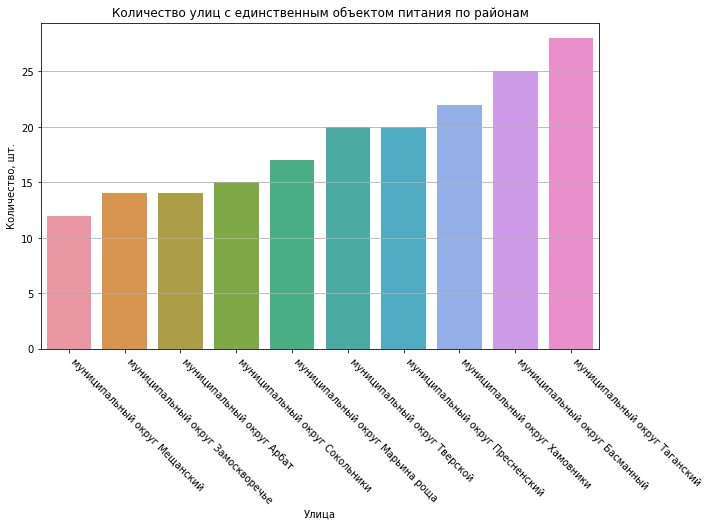

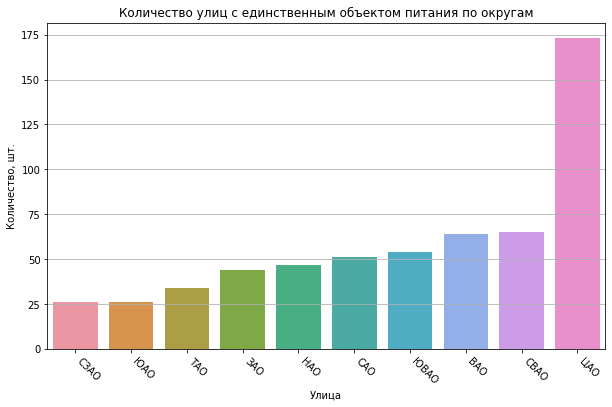

In [107]:
plot_barplot(
    x='area',
    y='street',
    data=area_stat_one,
    fsize=(10,6),
    title='Количество улиц с единственным объектом питания по районам',
    xlabel='Улица',
    ylabel='Количество, шт.',
    xticks=None,)
plot_barplot(
    x='okrug',
    y='street',
    data=okrug_stat_one,
    fsize=(10,6),
    title='Количество улиц с единственным объектом питания по округам',
    xlabel='Улица',
    ylabel='Количество, шт.',
    xticks=None,)

В ЦАО превышение таких улиц по сравнению с другими райнами в несколько раз! Посмотрю, почему там таких улиц много. Предположу, что это какие-нибудь очень короткие улицы, тупики, где физически невозможно разместить много кафе и ресторанов.

In [108]:
street_stat[street_stat.okrug == 'ЦАО'].street.values[:10]

array(['1-й Басманный переулок', '1-й Голутвинский переулок',
       '1-й Гончарный переулок', '1-й Зачатьевский переулок',
       '1-й Казачий переулок', '1-й Коптельский переулок',
       '1-й Котельнический переулок', '1-й Красногвардейский проезд',
       '1-й Люсиновский переулок', '1-й Монетчиковский переулок'],
      dtype=object)

#### Посмотрю, какие виды улиц с одним объектом питания есть в ЦАО и в целом:

In [109]:
street_one_types = street_stat.street.str.extract('((?<=[^А-ЯЙЁа-яйё\-])[а-я ]{3,}|^[а-я ]{3,})')[0].str.strip().value_counts()
street_one_types_CAO = street_stat[street_stat.okrug == 'ЦАО'].street.str.extract('((?<=[^А-ЯЙЁа-яйё\-])[а-я ]{3,}|^[а-я ]{3,})')[0].str.strip().value_counts()
street_one_types = street_one_types.to_frame('Всего').join(street_one_types_CAO, how='outer').rename(columns={0:'ЦАО'}).fillna(0)
street_one_types = street_one_types[[street_one_types.columns[1], street_one_types.columns[0]]].sort_values(by='Всего')
street_one_types

,ЦАО,Всего
территория,0.00,1
деревня,0.00,1
микрорайон,0.00,1
проектируемый проезд,0.00,2
поселок,0.00,2
квартал,0.00,3
линия,0.00,4
просек,0.00,4
тупик,6.00,9
аллея,0.00,10


In [110]:
# подготовка для графика
street_one_types_st = street_one_types.stack().reset_index().rename(columns={'level_0': 'тип', 'level_1': 'охват', 0:'количество'})
street_one_types_st.head()

,тип,охват,количество
0,территория,ЦАО,0.00
1,территория,Всего,1.00
2,деревня,ЦАО,0.00
3,деревня,Всего,1.00
4,микрорайон,ЦАО,0.00


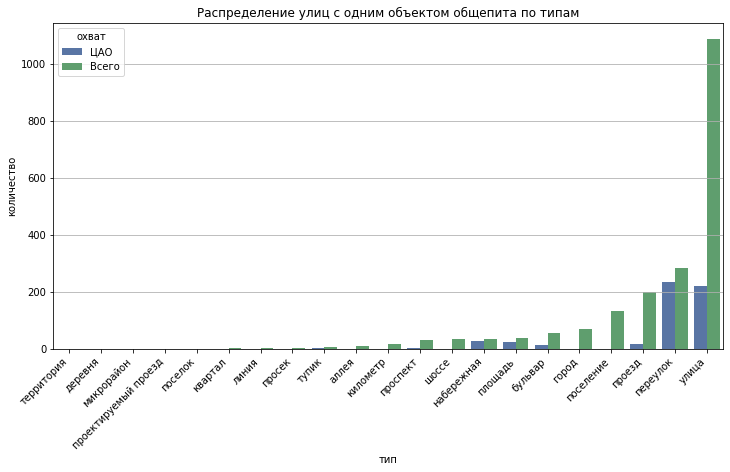

In [111]:
plt.subplots(figsize=(12,6))
sns.barplot(x='тип', y='количество', hue='охват', data=street_one_types_st)
plt.title('Распределение улиц с одним объектом общепита по типам')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

Нормирую значения:

In [112]:
street_one_types_norm = street_one_types.apply(lambda x: x / x['Всего'], axis=1)
street_one_types_norm = street_one_types_norm.sort_values(by='ЦАО')
street_one_types_norm

,ЦАО,Всего
территория,0.00,1.00
поселение,0.00,1.00
город,0.00,1.00
аллея,0.00,1.00
просек,0.00,1.00
линия,0.00,1.00
километр,0.00,1.00
поселок,0.00,1.00
проектируемый проезд,0.00,1.00
микрорайон,0.00,1.00


In [113]:
street_one_types_norm_st = street_one_types_norm.stack().reset_index().rename(columns={'level_0': 'тип', 'level_1': 'охват', 0:'количество'})

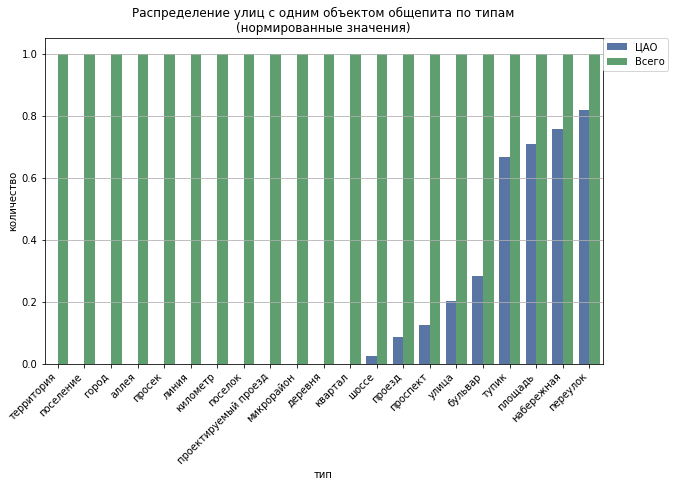

In [114]:
plt.subplots(figsize=(10,6))
sns.barplot(x='тип', y='количество', hue='охват', data=street_one_types_norm_st)
plt.title('Распределение улиц с одним объектом общепита по типам\n(нормированные значения)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(loc=(1,0.9))
plt.show()

Вывод: улицы с одним объектом общественного питания есть во всех районах, в т.ч. и в ЦАО, однако большая часть тупиков, переулков, набережных, площадей с единственным заведением расположена именно в центре.

## 2.9 <a id='2.9'></a>Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [115]:
areas_count = data.area.value_counts()
okrug_count = data.okrug.value_counts()

In [116]:
streets_main = street_objects_count[~street_objects_count.index.str.contains('город')&~street_objects_count.index.str.contains(',')].head(10).index
areas_main = areas_count.head(10).index
okrug_main = okrug_count.head(10).index

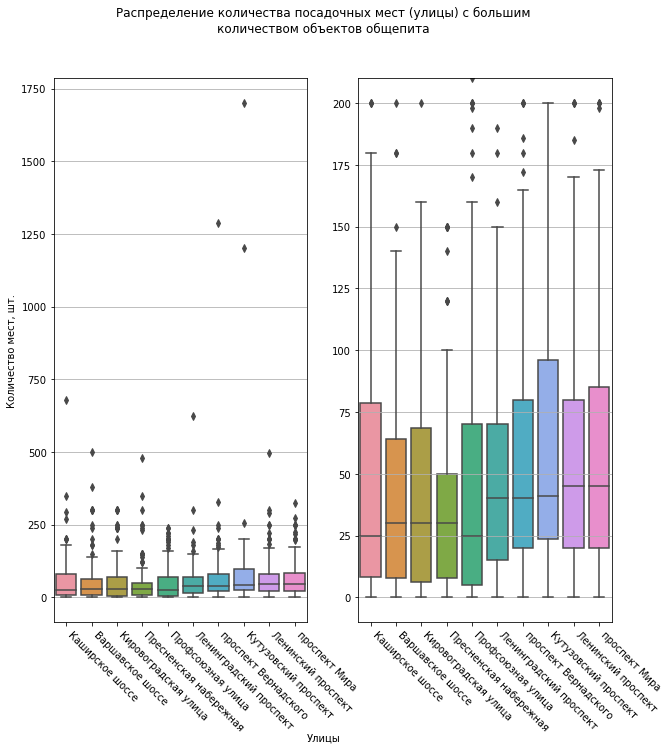

In [117]:
eng_rus_for_plot = {'street':'улицы',
                   'area':'районы',
                   'okrug':'округа'}
def plot_main_boxplots(filter_, x, ytop):
    
    order = data[data[x].isin(filter_)&~data.wrong_seats].groupby(x)['number_seats'].median().sort_values(ascending=True).index
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.suptitle('Распределение количества посадочных мест ('+eng_rus_for_plot[x]+') с большим'+\
                '\nколичеством объектов общепита')
    plt.subplot(1,2,1)
    sns.boxplot(x=x, y='number_seats', data=data[data[x].isin(filter_)], order=order)
    plt.ylabel('Количество мест, шт.')
    plt.xlabel('')
    if x=='area': # убираю "муниципальные округа" из названий
        locs, ticks = plt.xticks()
        for i in range(len(ticks)):
            ticks[i].set_text(re.sub('муниципальный округ ', '', ticks[i].get_text()))
        plt.xticks(locs, ticks)
    plt.xticks(rotation=-45, ha='left')
    bottom1, top1 = plt.ylim()
    plt.grid(axis='y')
    plt.subplot(1,2,2)
    sns.boxplot(x=x, y='number_seats', data=data[data[x].isin(filter_)], order=order)
    plt.xticks(rotation=-45, ha='left')
    plt.ylim(bottom1 * ytop / top1, ytop)
    plt.grid(axis='y')
    plt.xlabel('')
    plt.ylabel('')
    if x=='area': # убираю "муниципальные округа" из названий
        locs, ticks = plt.xticks()
        for i in range(len(ticks)):
            ticks[i].set_text(re.sub('муниципальный округ ', '', ticks[i].get_text()))
        plt.xticks(locs, ticks)
    fig.text(0.5, -0.04, eng_rus_for_plot[x][0].upper() + eng_rus_for_plot[x][1:], ha='center')
    plt.show()
    
plot_main_boxplots(streets_main, 'street', ytop=210)

В среднем на загруженных улицах встречается 25-45 посадочных мест, совсем немного.

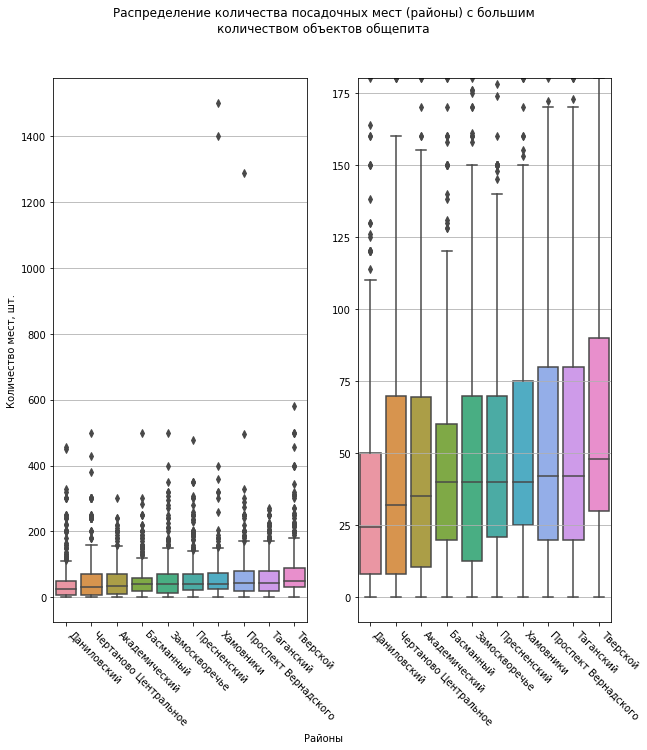

In [118]:
plot_main_boxplots(areas_main, 'area', ytop=180)

По районам примерно так же.

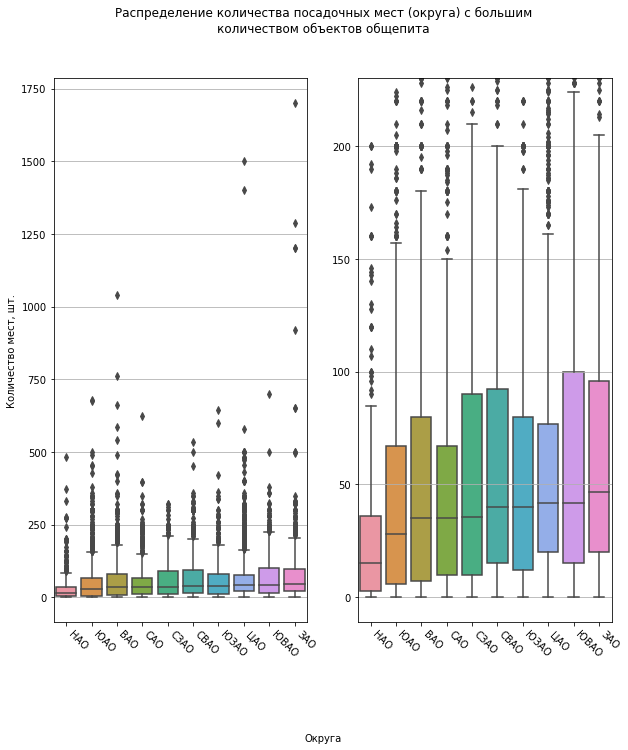

In [119]:
plot_main_boxplots(okrug_main, 'okrug', ytop=230)

По округам все примерно одинаковы, кроме НАО, где явно меньше, в среднем 10-15 посадочных мест.

#### Посмотрю на распределение посадочных мест в зависимости от количества заведений на улице, создав дополнительные категории:
- единственное заведение
- меньше 10 на улице
- больше 10
- больше 100

In [120]:
def categorize_streets(number):
    if number > 1000:
        return 'больше 1000'
    elif number > 100:
        return 'больше 100'
    elif number > 10:
        return 'больше 10'
    elif number == 1:
        return 'единственное'
    elif number > 1:
        return 'меньше 10'
    return 'неверное число'

In [121]:
street_objects_count_categories = street_objects_count.apply(categorize_streets)

In [122]:
# проверка
street_objects_count_categories.value_counts()

меньше 10       1014
единственное     608
больше 10        324
больше 100        11
Name: street, dtype: int64

In [123]:
data = data.merge(street_objects_count_categories, left_on='street', right_index=True, suffixes=('', '_count'))
data = data.merge(street_objects_count, left_on='street', right_index=True, suffixes=('', '_count_num'))

In [124]:
data[~data.wrong_seats].groupby('street_count').number_seats.median().sort_values(ascending=True).index

Index(['больше 10', 'больше 100', 'меньше 10', 'единственное'], dtype='object', name='street_count')

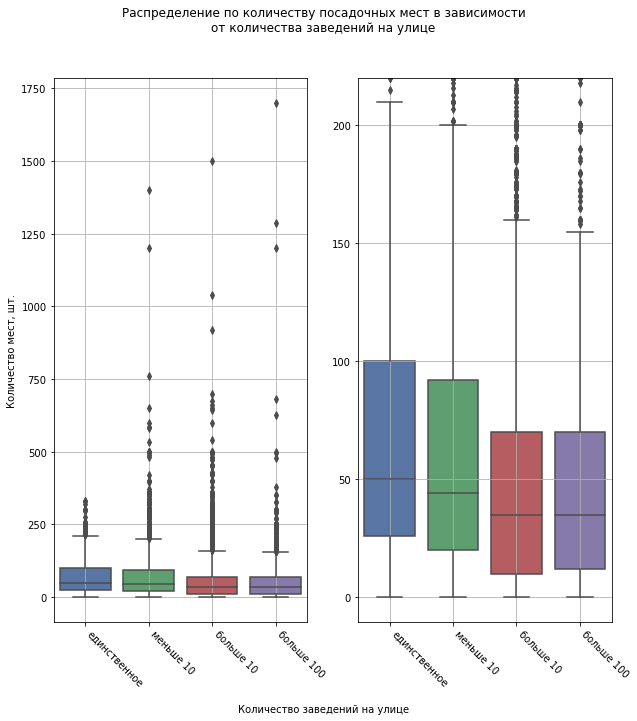

In [125]:
order = ['единственное' , 'меньше 10', 'больше 10', 'больше 100']

fig, ax = plt.subplots(figsize=(10,10))
plt.suptitle('Распределение по количеству посадочных мест в зависимости'+\
            '\nот количества заведений на улице')
plt.subplot(1,2,1)
sns.boxplot(x='street_count', y='number_seats', data=data, order=order)
plt.xticks(rotation=-45, ha='left')
bottom1, top1 = plt.ylim()
plt.xlabel('')
plt.ylabel('Количество мест, шт.')
plt.grid()
plt.subplot(1,2,2)
sns.boxplot(x='street_count', y='number_seats', data=data, order=order)
plt.xticks(rotation=-45, ha='left')
plt.ylim(bottom1 * 220 / top1, 220)
plt.xlabel('')
plt.ylabel('')
fig.text(0.5, 0, 'Количество заведений на улице', ha='center', )
plt.grid()
plt.show()

Единственное заведение на улице имеет самое высокое значение среднего числа мест на заведение - 50, с ростом числа заведений число мест падает на 30% до плотности 10 заведений на улицу, а дальнейшее уплотнение падения числа мест не даёт.

#### Построю распределение количества улиц по вышеприведенным категориям по округам:

In [126]:
okrugs_streets_stat = data.groupby(['okrug', 'street_count'], as_index=False).agg({'id': 'nunique'})

In [127]:
okrugs_streets_stat2 = (data
                       .pivot_table(index='okrug',
                                    columns='street_count',
                                    values='id', 
                                    aggfunc='nunique')
                        .fillna(0)
                       )
okrugs_streets_stat2

street_count,больше 10,больше 100,единственное,меньше 10
okrug,,,,
ВАО,749.00,0.00,63.00,460.00
ЗАО,619.00,387.00,44.00,362.00
Зеленоград,100.00,0.00,1.00,25.00
МКАД,0.00,0.00,12.00,21.00
МО,0.00,0.00,0.00,2.00
НАО,179.00,0.00,41.00,134.00
САО,664.00,272.00,51.00,356.00
СВАО,545.00,197.00,65.00,493.00
СЗАО,426.00,0.00,26.00,272.00


In [128]:
# изменение порядка колонок по смыслу
okrugs_streets_stat2 = okrugs_streets_stat2.reindex(['единственное', 'меньше 10', 'больше 10', 'больше 100'], axis=1)

In [129]:
# изменение порядка перечисления по увеличению
order = okrugs_streets_stat2.sum(axis=1).sort_values(ascending=True).index
okrugs_streets_stat2 = okrugs_streets_stat2.reindex(order)

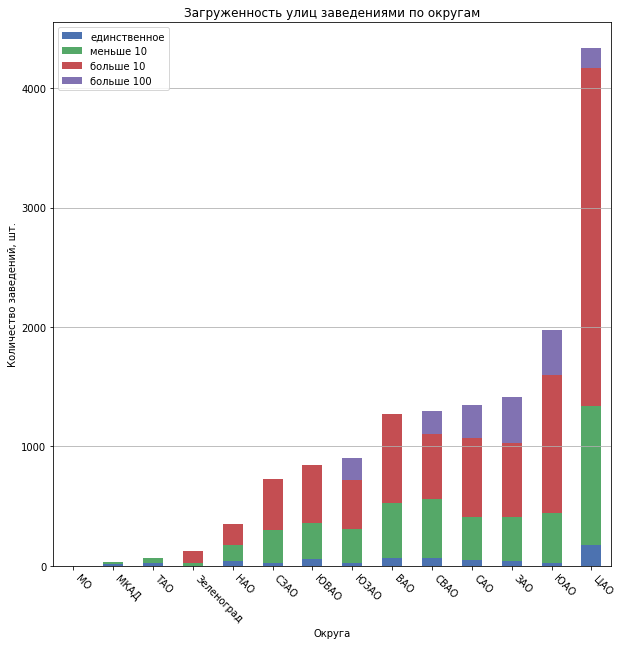

In [130]:
fig, ax= plt.subplots(figsize=(10,10))
plt.title('Загруженность улиц заведениями по округам')
okrugs_streets_stat2.plot(kind='bar', stacked=True, ax=ax)
plt.ylabel('Количество заведений, шт.')
plt.xlabel('Округа')
plt.xticks(rotation=-45, ha='left')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show()

Нормированные значения

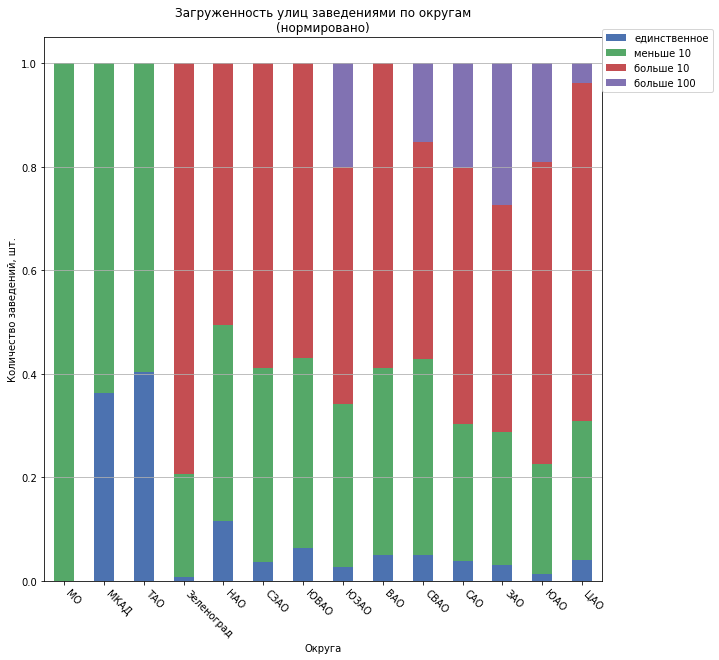

In [131]:
okrugs_streets_stat2_norm = okrugs_streets_stat2.apply(lambda x: x / sum(x), axis=1)

fig, ax= plt.subplots(figsize=(10,10))
okrugs_streets_stat2_norm.plot(kind='bar', stacked=True, ax=ax)
plt.title('Загруженность улиц заведениями по округам\n(нормировано)')
plt.ylabel('Количество заведений, шт.')
plt.xlabel('Округа')
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y')
plt.legend(loc=(1,0.9))
plt.show()

- Больше всего свободных улиц в ТАО
- Больше всего самых загруженных в ЗАО

#### Соотношение сетевых и несетевых заведений по округам:

In [132]:
okrugs_chain_stat = data.pivot_table(index='okrug', columns='is_chain', values='id', aggfunc='nunique')

In [133]:
order_chain = okrugs_chain_stat.sum(axis=1).sort_values().index
okrugs_chain_stat = okrugs_chain_stat.reindex(order_chain)

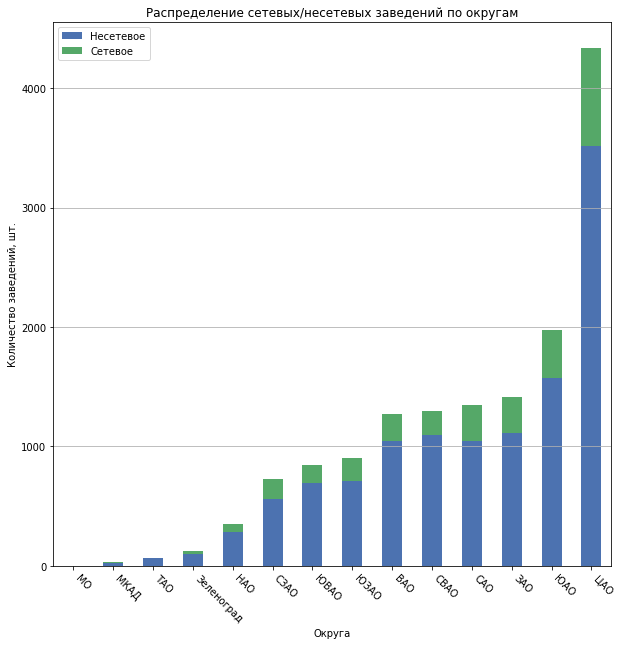

In [134]:
fig, ax= plt.subplots(figsize=(10,10))
okrugs_chain_stat.plot(kind='bar', stacked=True, ax=ax)
plt.title('Распределение сетевых/несетевых заведений по округам')
plt.ylabel('Количество заведений, шт.')
plt.xlabel('Округа')
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y')
plt.legend(('Несетевое', 'Сетевое'), loc='upper left')
plt.show()

In [135]:
# нормирование
okrugs_chain_stat_norm = okrugs_chain_stat.apply(lambda x: x / sum(x), axis=1)
okrugs_chain_stat_norm

is_chain,False,True
okrug,,
МО,nan,nan
МКАД,0.67,0.33
ТАО,0.94,0.06
Зеленоград,0.79,0.21
НАО,0.81,0.19
СЗАО,0.77,0.23
ЮВАО,0.82,0.18
ЮЗАО,0.79,0.21
ВАО,0.82,0.18


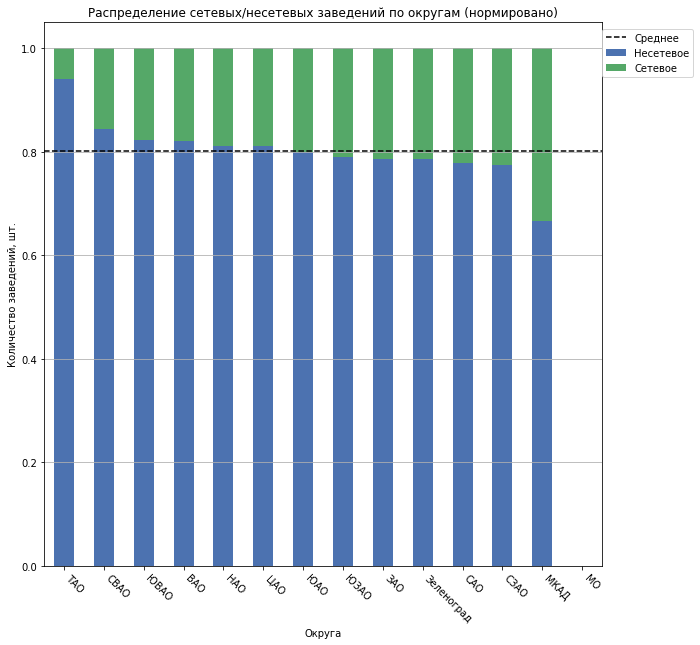

In [136]:
fig, ax= plt.subplots(figsize=(10,10))
okrugs_chain_stat_norm.sort_values(by=True).plot(kind='bar', stacked=True, ax=ax)
plt.title('Распределение сетевых/несетевых заведений по округам (нормировано)')
plt.ylabel('Количество заведений, шт.')
plt.xlabel('Округа')
plt.axhline(okrugs_chain_stat_norm[False].mean(), ls='--', color='black')
plt.xticks(rotation=-45, ha='left')
plt.grid(axis='y')
plt.legend(('Среднее','Несетевое', 'Сетевое'), loc=(1,0.9))
plt.show()

Как видно из графика, доля сетевых заведений практически везде одинакова (около 20%), лишь на МКАДе несколько больше сетевых (32%), а в ТАО - несетевых (6%). Т.к. сетевыми заведениями больше представлены ПБО, логично их расположение на МКАДе, а в ТАО недостаток сетевых объясняется инертностью рынка - Новая Москва была присоединена к Москве не так давно - в 2012 г (<a href='https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D0%B0%D1%8F_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0'>Википедия</a>).

#### График рассеяния

Сгруппирую данные по улицам для получения уникальных результатов. Для вычисления агрегированного значения количества мест использую медиану, т.к. при малом количестве заведений выбросы будут сильно влиять на результат. Для количества заведений на улице (`street_objects_number`) использую среднее, но если всё верно, эти числа одинаковы и тип столбца останется `int`.

In [137]:
displot_table = data[~data.wrong_seats].groupby(['street']).agg({'number_seats': 'median',
                           'street_count_num': 'mean'})
displot_table.number_seats = displot_table.number_seats.astype('int')

In [138]:
print_table_info(displot_table)

Начало таблицы:


,number_seats,street_count_num
street,,
1-й Автозаводский проезд,20,3
1-й Амбулаторный проезд,70,2
1-й Балтийский переулок,60,1
1-й Басманный переулок,50,1
1-й Ботанический проезд,40,1


...
Конец таблицы:


,number_seats,street_count_num
street,,
улица Юности,24,3
улица Юных Ленинцев,65,22
улица Яблочкова,120,7
шоссе Фрезер,10,1
шоссе Энтузиастов,36,47


Всего строк: 1954


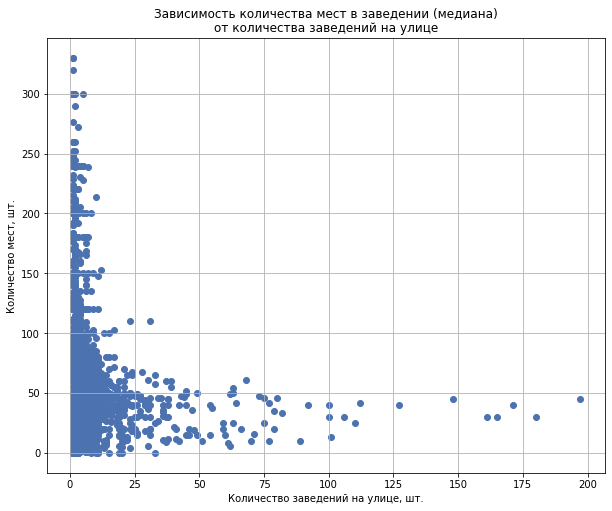

In [139]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(displot_table['street_count_num'], displot_table['number_seats'])
plt.title('Зависимость количества мест в заведении (медиана)'+\
         '\nот количества заведений на улице')
plt.ylabel('Количество мест, шт.')
plt.xlabel('Количество заведений на улице, шт.')
plt.grid()
plt.show()

Вывод: чаще встречается ситуация, когда на улице меньше заведений, но в них большое количество мест (левая часть графика) - до 300 и выше. При увеличении количества заведений на улице, наблюдается тенденция к уменьшению количества мест на каждое заведение - около 50.

## 2.10 <a id='2.10'></a>Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

### Обработка исходных данных:
В предоставленных данных об объектах общепита в Москве были как незначительные проблемы (нестандартный тип столбца вместо булевого типа для отображения сетевых заведений), так и серьезные - нестандартизированные названия сетей, непригодные для группировки, пришлось исправлять это вручную, и всё равно ошибки при этом неизбежны, данные не стали абсолютно точными.
Было удалено незначительное количество дубликатов (менее 1%).
Подозрительно выглядят записи о столовых и ресторанах с 0 посадочных мест. Дополнительно фильтровал эти данные при анализе.

### Анализ предоставленных данных:
***Наименее загруженные улицы*** с одним объектом общественного питания есть *во всех районах*, в т.ч. и в *ЦАО*, однако большая часть тупиков, переулков, набережных, площадей с единственным заведением расположена именно в центре.

***Кафе*** является наиболее распространенным видом объекта общественного питания. Кафе дешевле, чем рестораны, в них часто есть wi-fi точки доступа, в отличие от столовых. Очевидно, в условиях мегаполиса такой формат оказался наиболее удобным и модным.

*Сетевые заведения* по количеству посадочных мест **почти не отличаются** от *несетевых*, однако у них встречаются заведения с количеством посадочных мест вплоть до 1750. У сетевых же количество как правило не выходит за 300.

***Несетевых*** заведений по количеству **более чем в 4 раза больше**, чем сетевых. Такой явный перевес можно объяснить тем, что открыть свой бизнес в сфере питания является не такой сложной задачей и многим по плечу.

***Сетевое*** распространение больше всего характерно для **предприятий быстрого обслуживания**, таких как KFС, Макдоналдс и т.п. - более 40% от всех заведений данного типа.

***Доля сетевых заведений*** практически везде одинакова (около 20%), лишь на МКАДе несколько больше сетевых (32%), а в ТАО - несетевых (6%). Т.к. сетевыми заведениями больше представлены ПБО, логично их расположение на МКАДе, а в ТАО недостаток сетевых объясняется инертностью рынка - Новая Москва была присоединена к Москве не так давно - в 2012 г (Википедия).

***Среднее количество заведений в сети***: 5, наиболее часто встречающееся - 1. Возможно, эти сети распространены за пределами Москвы, а то и в других странах.

***Среднее количество посадочных мест*** - единственное заведение на улице имеет самое высокое значение среднего числа мест на заведение - 50, с ростом числа заведений число мест падает на 30% до плотности 10 заведений на улицу, а дальнейшее уплотнение *падения числа мест не даёт*.

***Самые загруженные*** заведениями общепита - московские **вылетные магистрали**. Это логично ввиду их большой протяженности, и большого потока потенциальных посетителей.
Однако в топ попали и другие улицы:
- Кировоградская улица вышла в топ за счёт большого количества заведений общепита в ТРЦ Columbus
- Пресненская набережная - за счёт расположения вблизи делового центра Москва City.

Они оказались даже более популярны, чем вылетные магистрали востока Москвы (шоссе Энтузиастов, Волгоградский проспект).

Чаще встречается ситуация, когда на улице меньше заведений, но в них большое количество мест - до 300 и выше. **При увеличении количества заведений** на улице, наблюдается тенденция к **уменьшению количества мест** на каждое заведение - около 50.

### Рекомендации по открытию своего бизнеса (необычное кафе с роботами):

Заведение с роботами вместо официантов люди будут посещать явно не из-за дешевизны, и даже не из-за качества еды, а скорее в поисках чего-то необычного. Очевидно, целевая аудитория у него - люди искушенные с высоким уровнем достатка, или гики, помешанные на роботах, готовые доплачивать за такой необычный сервис. Очевидно, лучшее место расположения - **центр города**. Можно было бы предположить, что он перегружен, однако анализ данных показал, что даже в центре есть улицы всего с единственным заведением на них, в т.ч. и набережные, вероятно, с хорошим видом. Стоит изучить эти варианты.

Не быть "на виду" бояться не стоит, т.к. сейчас заведения продают себя в основном в интернете, в соцсетях, местоположение вторично, да и более дешевые заведения на более загруженных улицах не будут составлять конкуренцию, т.к. у них другая целевая аудитория.

По типу, мне кажется, пока мы не доросли до повсеместной робофикации, и робот в кафе воспринимается как что-то киберпанковое, более логично открыть **ресторан**, к тому же благодаря изначальной высокой стоимости можно предположить, что это не сильно увеличит итоговую смету.

**Количество мест**, как и в среднем по ресторанам - 90-100.

# <a id='3'></a>Шаг №3. Презентация

<a href='https://yadi.sk/i/Yr_2tRrv1s2XVw'>Ссылка на презентацию</a>